# NLP Sentiment Analysis Project


Amazon ürün yorumlarından müşteri memnuniyetini otomatik olarak tespit eden ve iş değeri yaratacak
öngörüler sunan bir sentiment analysis sistemi geliştirmek. 
<font color = 'red'>
    
Proje İçeriği:


- [Detaylı EDA](#1)
  

  [Dataset Overview](#2)
  
  [Target Variable Analysis](#3)
  
  [Text Data Analysis](#4)
  
  [Temporal Analysis](#5)
 
  [User Behavior Analysis](#6)

  [Product Analysis](#7)
 
- [Text Preprocessing ve Feature Engineering](#8)
 
  [Data Cleaning](#9)
  
  [Text Preprocessing Pipeline](#10)
  
  [Advanced Feature Engineering](#11)
  
  [Word Embeddings](#12)
 

- [Model Development](#13)
  
  [Baseline Models](#14)

  [Traditional Machine Learning](#15)
  
  [Model Training Strategy](#16)
  

- [Model Evaluation ve Comparison](#17)
  
  [Evaluation Metrics](#18)

  [Error Analysis](#19)
  
  [Feature Importance Analysis](#20)

  [Model Comparison](#21)
  
- [Business Insights ve Recommendations](#22)

  [Product Insights](#23)
  
  [Customer Insights](#24)

  [Actionable Recommendations](#25)

- [Visualization ve Reporting](#26)

  [EDA Visualizations](#27)
  
  [Model Performance Visualizations](#28)

  [Business Dashboards](#29)



  
    

In [313]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import re
from collections import Counter
from datetime import datetime
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [314]:
data4=pd.read_csv("/Users/nilsuaksu/Downloads/Reviews.csv")

<a id = "1"></a><br>
## Detaylı EDA (Exploratory Data Analysis)

<a id = "2"></a><br>
## Dataset Overview
- Veri setinin boyutunu, sütun isimlerini ve veri tiplerini inceleme
- Eksik değer analizi ve pattern tespiti
- Duplicate kayıt kontrolü
- İlk 10 ve son 10 satırı görüntüleme


In [317]:
print("=" * 50)
print("VERİ SETİ BOYUTU VE GENEL BİLGİLER")
print("=" * 50)

# Veri setinin boyutu
print(f"Satır sayısı: {data4.shape[0]:,}")
print(f"Sütun sayısı: {data4.shape[1]}")
print(f"Toplam veri noktası: {data4.size:,}")


VERİ SETİ BOYUTU VE GENEL BİLGİLER
Satır sayısı: 568,454
Sütun sayısı: 10
Toplam veri noktası: 5,684,540


In [318]:
print("\n" + "=" * 50)
print("SÜTUN İSİMLERİ VE VERİ TİPLERİ")
print("=" * 50)

# Sütun isimleri ve veri tipleri
print(data4.info())


SÜTUN İSİMLERİ VE VERİ TİPLERİ
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB
None


In [319]:
print("\n" + "=" * 50)
print("EKSİK DEĞER ANALİZİ")
print("=" * 50)

# Eksik değer kontrolü
eksik_degerler = data4.isnull().sum()
print("Eksik değer sayıları:")
for sutun, eksik in eksik_degerler.items():
    if eksik > 0:
        print(f"{sutun}: {eksik:,} ({eksik/len(data4)*100:.2f}%)")
    else:
        print(f"{sutun}: {eksik}")

print(f"\nToplam eksik değer: {data4.isnull().sum().sum():,}")


EKSİK DEĞER ANALİZİ
Eksik değer sayıları:
Id: 0
ProductId: 0
UserId: 0
ProfileName: 26 (0.00%)
HelpfulnessNumerator: 0
HelpfulnessDenominator: 0
Score: 0
Time: 0
Summary: 27 (0.00%)
Text: 0

Toplam eksik değer: 53


In [320]:
print("\n" + "=" * 50)
print("DUPLICATE KAYIT KONTROLÜ")
print("=" * 50)

# Duplicate kontrol
duplicate_sayisi = data4.duplicated().sum()
print(f"Duplicate satır sayısı: {duplicate_sayisi:,}")

if duplicate_sayisi > 0:
    print(f"Duplicate oranı: %{duplicate_sayisi/len(data4)*100:.2f}")
    
    # Hangi sütunlara göre duplicate olduğunu kontrol et
    print("\nFarklı sütun kombinasyonlarına göre duplicate analizi:")
    print(f"Tüm sütunlar: {data4.duplicated().sum():,}")
    print(f"Text sütunu: {data4.duplicated(subset=['Text']).sum():,}")
    print(f"UserId + ProductId + Text: {data4.duplicated(subset=['UserId', 'ProductId', 'Text']).sum():,}")



DUPLICATE KAYIT KONTROLÜ
Duplicate satır sayısı: 0


In [321]:
print("\n" + "=" * 50)
print("İLK 10 SATIR")
print("=" * 50)

data4.head(10)


İLK 10 SATIR


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


In [322]:
print("\n" + "=" * 50)
print("SON 10 SATIR")
print("=" * 50)

data4.tail(10)


SON 10 SATIR


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
568444,568445,B001EO7N10,A2SD7TY3IOX69B,"BayBay ""BayBay Knows Best""",3,3,5,1245369600,Best Value for Chinese 5 Spice,"As a foodie, I use a lot of Chinese 5 Spice po..."
568445,568446,B001EO7N10,A2E5C8TTAED4CQ,S. Linkletter,2,2,5,1268006400,Five Spice Powder,"You can make this mix yourself, but the Star A..."
568446,568447,B001EO7N10,A2P9W8T7NTLG2Z,Andy,0,0,2,1328918400,Mixed wrong,I had ordered some of these a few months back ...
568447,568448,B001EO7N10,APWCOAVILK94B,"Real Named Person ""wowzee""",0,0,5,1322524800,"If its all natural, this is like panacea of Sp...","Hoping there is no MSG in this, this tastes ex..."
568448,568449,B001EO7N10,A1F6BHEYB7R6R7,James Braley,0,0,5,1308096000,Very large ground spice jars.,My only complaint is that there's so much of i...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...
568453,568454,B001LR2CU2,A3LGQPJCZVL9UC,srfell17,0,0,5,1338422400,Great Honey,"I am very satisfied ,product is as advertised,..."


<a id = "3"></a><br>
## Target Variable Analysis
- Score (1-5) dağılımının analizi
- Class imbalance durumu tespiti
- Binary classification için score transformation (1-2: Negative, 4-5: Positive, 3: Neutral - - -opsiyonel olarak çıkarılabilir)



In [324]:
print("=" * 60)
print("TARGET VARIABLE ANALYSIS - SCORE DAĞILIMI")
print("=" * 60)

print("\n SCORE (1-5) DAĞILIMI")
print("-" * 30)

# Score değerlerinin sayıları
score_counts = data4['Score'].value_counts().sort_index()
print("Score dağılımı:")
for score, count in score_counts.items():
    percentage = (count / len(data4)) * 100
    print(f"Score {score}: {count:,} review ({percentage:.2f}%)")

print(f"\nToplam review sayısı: {len(data4):,}")

TARGET VARIABLE ANALYSIS - SCORE DAĞILIMI

 SCORE (1-5) DAĞILIMI
------------------------------
Score dağılımı:
Score 1: 52,268 review (9.19%)
Score 2: 29,769 review (5.24%)
Score 3: 42,640 review (7.50%)
Score 4: 80,655 review (14.19%)
Score 5: 363,122 review (63.88%)

Toplam review sayısı: 568,454


In [325]:
print("\n CLASS IMBALANCE DURUMU")
print("-" * 30)

# En çok ve en az olan sınıflar
max_class = score_counts.max()
min_class = score_counts.min()
imbalance_ratio = max_class / min_class

print(f"En çok olan sınıf: {max_class:,} review")
print(f"En az olan sınıf: {min_class:,} review")
print(f"Imbalance oranı: {imbalance_ratio:.2f}:1")

# Imbalance değerlendirmesi
if imbalance_ratio > 10:
    print(" YÜKSEK CLASS IMBALANCE - Özel teknikler gerekli")
elif imbalance_ratio > 3:
    print(" ORTA CLASS IMBALANCE - Dikkat gerekli")
else:
    print("DÜŞÜK CLASS IMBALANCE - Normal")



 CLASS IMBALANCE DURUMU
------------------------------
En çok olan sınıf: 363,122 review
En az olan sınıf: 29,769 review
Imbalance oranı: 12.20:1
 YÜKSEK CLASS IMBALANCE - Özel teknikler gerekli


In [326]:
print("\n BINARY CLASSIFICATION İÇİN TRANSFORMATION")
print("-" * 30)

# Binary classification için dönüşüm
def transform_to_binary(score):
    if score in [1, 2]:
        return 'Negative'
    elif score in [4, 5]:
        return 'Positive'
    else:  # score == 3
        return 'Neutral'

# Yeni sütun oluştur
data4['Sentiment'] = data4['Score'].apply(transform_to_binary)

# Binary dağılım
binary_counts = data4['Sentiment'].value_counts()
print("Binary sentiment dağılımı:")
for sentiment, count in binary_counts.items():
    percentage = (count / len(data4)) * 100
    print(f"{sentiment}: {count:,} review ({percentage:.2f}%)")



 BINARY CLASSIFICATION İÇİN TRANSFORMATION
------------------------------
Binary sentiment dağılımı:
Positive: 443,777 review (78.07%)
Negative: 82,037 review (14.43%)
Neutral: 42,640 review (7.50%)



 NEUTRAL ÇIKARILMIŞ BINARY DAĞILIM
------------------------------
Neutral çıkarıldıktan sonra:
Positive: 443,777 review (84.40%)
Negative: 82,037 review (15.60%)
Toplam binary review: 525,814
Çıkarılan neutral review: 42,640
Binary imbalance oranı: 5.41:1

 VİZUALİZASYON
------------------------------


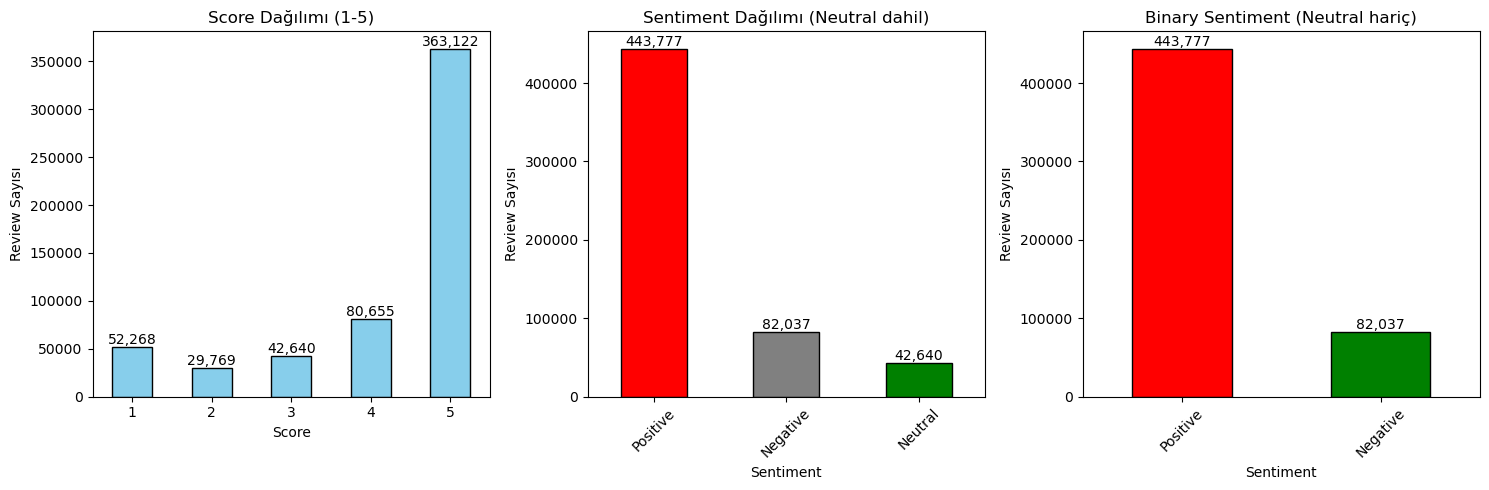


 ÖZET - HANGİ YAKLAŞIM SEÇİLMELİ?
------------------------------
 Multi-class (1-5): Daha detaylı analiz, ancak imbalance problemi
 Binary + Neutral: Orta yol, neutral'ları ayrı işlenebilir
 Binary (sadece pos/neg): En basit, ancak veri kaybı var

Veri kaybı oranı (neutral çıkarırsa): %7.50


In [327]:
print("\n NEUTRAL ÇIKARILMIŞ BINARY DAĞILIM")
print("-" * 30)

# Neutral'ları çıkar
data4_binary = data4[data4['Sentiment'] != 'Neutral'].copy()
binary_no_neutral = data4_binary['Sentiment'].value_counts()

print("Neutral çıkarıldıktan sonra:")
for sentiment, count in binary_no_neutral.items():
    percentage = (count / len(data4_binary)) * 100
    print(f"{sentiment}: {count:,} review ({percentage:.2f}%)")

print(f"Toplam binary review: {len(data4_binary):,}")
print(f"Çıkarılan neutral review: {len(data4) - len(data4_binary):,}")

# Binary imbalance
pos_count = binary_no_neutral['Positive']
neg_count = binary_no_neutral['Negative']
binary_imbalance = max(pos_count, neg_count) / min(pos_count, neg_count)
print(f"Binary imbalance oranı: {binary_imbalance:.2f}:1")

print("\n VİZUALİZASYON")
print("-" * 30)

# Görselleştirme
plt.figure(figsize=(15, 5))

# Subplot 1: Orijinal Score Dağılımı
plt.subplot(1, 3, 1)
score_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Score Dağılımı (1-5)')
plt.xlabel('Score')
plt.ylabel('Review Sayısı')
plt.xticks(rotation=0)
for i, v in enumerate(score_counts.values):
    plt.text(i, v, f'{v:,}', ha='center', va='bottom')

# Subplot 2: Binary Sentiment (Neutral dahil)
plt.subplot(1, 3, 2)
binary_counts.plot(kind='bar', color=['red', 'gray', 'green'], edgecolor='black')
plt.title('Sentiment Dağılımı (Neutral dahil)')
plt.xlabel('Sentiment')
plt.ylabel('Review Sayısı')
plt.xticks(rotation=45)
for i, v in enumerate(binary_counts.values):
    plt.text(i, v, f'{v:,}', ha='center', va='bottom')

# Subplot 3: Binary Sentiment (Neutral hariç)
plt.subplot(1, 3, 3)
binary_no_neutral.plot(kind='bar', color=['red', 'green'], edgecolor='black')
plt.title('Binary Sentiment (Neutral hariç)')
plt.xlabel('Sentiment')
plt.ylabel('Review Sayısı')
plt.xticks(rotation=45)
for i, v in enumerate(binary_no_neutral.values):
    plt.text(i, v, f'{v:,}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("\n ÖZET - HANGİ YAKLAŞIM SEÇİLMELİ?")
print("-" * 30)
print(" Multi-class (1-5): Daha detaylı analiz, ancak imbalance problemi")
print(" Binary + Neutral: Orta yol, neutral'ları ayrı işlenebilir")  
print(" Binary (sadece pos/neg): En basit, ancak veri kaybı var")
print(f"\nVeri kaybı oranı (neutral çıkarırsa): %{((len(data4) - len(data4_binary))/len(data4))*100:.2f}")

<a id = "4"></a><br>
## Text Data Analysis
Text Length Distribution:
- Summary uzunluk dağılımı
- Text uzunluk dağılımı
- Score ile text uzunluğu korelasyonu
  
Vocabulary Analysis:
- Toplam unique word sayısı
- En sık kullanılan 50 kelime
- Score bazında kelime sıklık farkları
- Rare words oranı
  
Text Quality Assessment:
- Boş/null text oranı
- Sadece rakam/sembol içeren reviews
- Çok kısa reviews (< 10 karakter)
- Çok uzun reviews (> 1000 karakter)


TEXT DATA ANALYSIS

 TEXT LENGTH DISTRIBUTION
----------------------------------------
TEXT UZUNLUK İSTATİSTİKLERİ:
Text min uzunluk: 12
Text max uzunluk: 21409
Text ortalama uzunluk: 436.22
Text medyan uzunluk: 302.00

SUMMARY UZUNLUK İSTATİSTİKLERİ:
Summary min uzunluk: 1
Summary max uzunluk: 128
Summary ortalama uzunluk: 23.45
Summary medyan uzunluk: 20.00

SCORE - TEXT UZUNLUK KORELASYONU:
Score vs Text Length korelasyon: -0.0773
Score vs Summary Length korelasyon: -0.0650

SCORE BAZINDA ORTALAMA UZUNLUKLAR:
       Text_Length  Summary_Length
Score                             
1       478.082364       24.467303
2       490.655010       24.899728
3       520.319841       26.075117
4       496.603273       24.828988
5       402.447373       22.563728


 VOCABULARY ANALYSIS
----------------------------------------
Toplam kelime sayısı: 46,822,421
Unique kelime sayısı: 111,150
Vocabulary richness: 0.0024

EN SIK KULLANILAN 50 KELİME:
 1. the             : 1,872,638
 2. i               

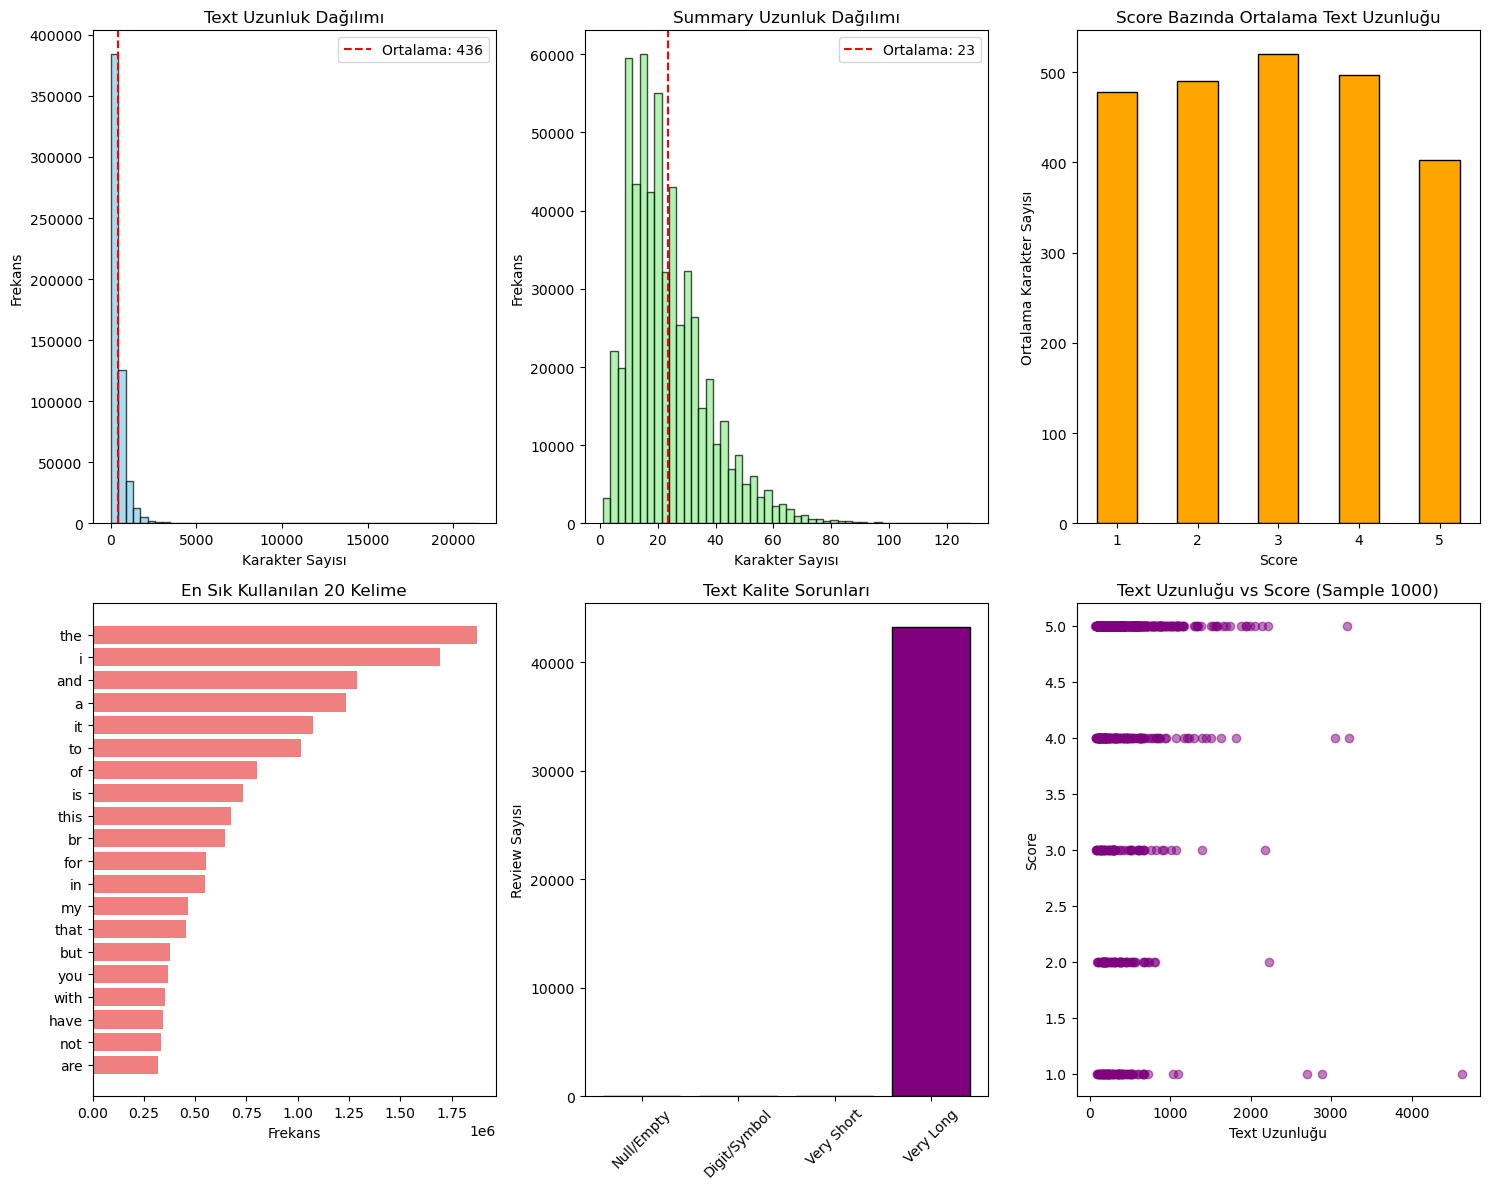


 ÖZET VE ÖNERİLER
----------------------------------------
Text preprocessing adımları için:
   - Çok kısa review'ları (0) çıkarılabilir
   - Çok uzun review'ları (43,294) kısaltılabilir
   - Rare word'leri (57,327) handle edilmeli
   - Top 50 kelime toplam kelimelerin büyük kısmını oluşturuyor


In [329]:
print("=" * 60)
print("TEXT DATA ANALYSIS")
print("=" * 60)


print("\n TEXT LENGTH DISTRIBUTION")
print("-" * 40)

# Text ve Summary uzunlukları hesapla
data4['Text_Length'] = data4['Text'].astype(str).str.len()
data4['Summary_Length'] = data4['Summary'].astype(str).str.len()

print("TEXT UZUNLUK İSTATİSTİKLERİ:")
print(f"Text min uzunluk: {data4['Text_Length'].min()}")
print(f"Text max uzunluk: {data4['Text_Length'].max()}")
print(f"Text ortalama uzunluk: {data4['Text_Length'].mean():.2f}")
print(f"Text medyan uzunluk: {data4['Text_Length'].median():.2f}")

print(f"\nSUMMARY UZUNLUK İSTATİSTİKLERİ:")
print(f"Summary min uzunluk: {data4['Summary_Length'].min()}")
print(f"Summary max uzunluk: {data4['Summary_Length'].max()}")
print(f"Summary ortalama uzunluk: {data4['Summary_Length'].mean():.2f}")
print(f"Summary medyan uzunluk: {data4['Summary_Length'].median():.2f}")

# Score ile text uzunluğu korelasyonu
print(f"\nSCORE - TEXT UZUNLUK KORELASYONU:")
correlation = data4['Score'].corr(data4['Text_Length'])
print(f"Score vs Text Length korelasyon: {correlation:.4f}")

correlation_summary = data4['Score'].corr(data4['Summary_Length'])
print(f"Score vs Summary Length korelasyon: {correlation_summary:.4f}")

# Score'a göre ortalama uzunluklar
print(f"\nSCORE BAZINDA ORTALAMA UZUNLUKLAR:")
score_length_stats = data4.groupby('Score')[['Text_Length', 'Summary_Length']].mean()
print(score_length_stats)



print("\n\n VOCABULARY ANALYSIS")
print("-" * 40)

# Tüm text'leri birleştir ve temizle
all_text = ' '.join(data4['Text'].astype(str).values)
# Basit temizlik - sadece harfler ve boşluk
clean_text = re.sub(r'[^a-zA-Z\s]', ' ', all_text.lower())
words = clean_text.split()

print(f"Toplam kelime sayısı: {len(words):,}")
print(f"Unique kelime sayısı: {len(set(words)):,}")
print(f"Vocabulary richness: {len(set(words))/len(words):.4f}")

# En sık kullanılan 50 kelime
word_freq = Counter(words)
top_50_words = word_freq.most_common(50)
print(f"\nEN SIK KULLANILAN 50 KELİME:")
for i, (word, count) in enumerate(top_50_words, 1):
    print(f"{i:2d}. {word:<15} : {count:,}")

# Rare words (sadece 1-2 kez geçenler)
rare_words = [word for word, count in word_freq.items() if count <= 2]
rare_word_ratio = len(rare_words) / len(set(words))
print(f"\nRARE WORDS ANALİZİ:")
print(f"1-2 kez geçen kelime sayısı: {len(rare_words):,}")
print(f"Rare words oranı: %{rare_word_ratio*100:.2f}")

# Score bazında kelime sıklık farkları (top 10 kelime için)
print(f"\nSCORE BAZINDA KELİME SIKLIK FARKLARI (Top 10):")
for score in [1, 2, 3, 4, 5]:
    score_texts = ' '.join(data4[data4['Score'] == score]['Text'].astype(str).values)
    score_clean = re.sub(r'[^a-zA-Z\s]', ' ', score_texts.lower())
    score_words = score_clean.split()
    score_freq = Counter(score_words)
    top_10_score = score_freq.most_common(10)
    print(f"\nScore {score} - Top 10 kelime:")
    for word, count in top_10_score:
        print(f"  {word:<12} : {count:,}")



print("\n\n TEXT QUALITY ASSESSMENT")
print("-" * 40)

# Boş/null text oranı
null_text = data4['Text'].isnull().sum()
empty_text = (data4['Text'].astype(str) == '').sum()
print(f"Null text sayısı: {null_text:,}")
print(f"Boş text sayısı: {empty_text:,}")
print(f"Toplam boş/null oran: %{((null_text + empty_text)/len(data4))*100:.2f}")

# Sadece rakam/sembol içeren reviews
digit_symbol_pattern = r'^[^a-zA-Z]*$'
digit_symbol_reviews = data4['Text'].astype(str).str.match(digit_symbol_pattern).sum()
print(f"\nSadece rakam/sembol içeren review: {digit_symbol_reviews:,}")
print(f"Oranı: %{(digit_symbol_reviews/len(data4))*100:.2f}")

# Çok kısa reviews (< 10 karakter)
very_short = (data4['Text_Length'] < 10).sum()
print(f"\nÇok kısa review (< 10 karakter): {very_short:,}")
print(f"Oranı: %{(very_short/len(data4))*100:.2f}")

# Çok uzun reviews (> 1000 karakter)
very_long = (data4['Text_Length'] > 1000).sum()
print(f"\nÇok uzun review (> 1000 karakter): {very_long:,}")
print(f"Oranı: %{(very_long/len(data4))*100:.2f}")


print("\n\n VİZUALİZASYON")
print("-" * 40)

plt.figure(figsize=(15, 12))

# Subplot 1: Text Length Distribution
plt.subplot(2, 3, 1)
plt.hist(data4['Text_Length'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Text Uzunluk Dağılımı')
plt.xlabel('Karakter Sayısı')
plt.ylabel('Frekans')
plt.axvline(data4['Text_Length'].mean(), color='red', linestyle='--', label=f'Ortalama: {data4["Text_Length"].mean():.0f}')
plt.legend()

# Subplot 2: Summary Length Distribution  
plt.subplot(2, 3, 2)
plt.hist(data4['Summary_Length'], bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
plt.title('Summary Uzunluk Dağılımı')
plt.xlabel('Karakter Sayısı')
plt.ylabel('Frekans')
plt.axvline(data4['Summary_Length'].mean(), color='red', linestyle='--', label=f'Ortalama: {data4["Summary_Length"].mean():.0f}')
plt.legend()

# Subplot 3: Score vs Text Length
plt.subplot(2, 3, 3)
score_length_stats['Text_Length'].plot(kind='bar', color='orange', edgecolor='black')
plt.title('Score Bazında Ortalama Text Uzunluğu')
plt.xlabel('Score')
plt.ylabel('Ortalama Karakter Sayısı')
plt.xticks(rotation=0)

# Subplot 4: Top 20 Words
plt.subplot(2, 3, 4)
top_20 = word_freq.most_common(20)
words_list = [word for word, count in top_20]
counts_list = [count for word, count in top_20]
plt.barh(words_list, counts_list, color='lightcoral')
plt.title('En Sık Kullanılan 20 Kelime')
plt.xlabel('Frekans')
plt.gca().invert_yaxis()

# Subplot 5: Text Quality Issues
plt.subplot(2, 3, 5)
quality_issues = ['Null/Empty', 'Digit/Symbol', 'Very Short', 'Very Long']
issue_counts = [null_text + empty_text, digit_symbol_reviews, very_short, very_long]
colors = ['red', 'orange', 'yellow', 'purple']
plt.bar(quality_issues, issue_counts, color=colors, edgecolor='black')
plt.title('Text Kalite Sorunları')
plt.ylabel('Review Sayısı')
plt.xticks(rotation=45)

# Subplot 6: Length vs Score Scatter
plt.subplot(2, 3, 6)
sample_data = data4.sample(1000)  # Performance için sample
plt.scatter(sample_data['Text_Length'], sample_data['Score'], alpha=0.5, color='purple')
plt.title('Text Uzunluğu vs Score (Sample 1000)')
plt.xlabel('Text Uzunluğu')
plt.ylabel('Score')

plt.tight_layout()
plt.show()

print("\n ÖZET VE ÖNERİLER")
print("-" * 40)
print("Text preprocessing adımları için:")
print(f"   - Çok kısa review'ları ({very_short:,}) çıkarılabilir")
print(f"   - Çok uzun review'ları ({very_long:,}) kısaltılabilir") 
print(f"   - Rare word'leri ({len(rare_words):,}) handle edilmeli")
print(f"   - Top {len(top_50_words)} kelime toplam kelimelerin büyük kısmını oluşturuyor")

<a id = "5"></a><br>
## Temporal Analysis
- Yıllık review sayısı trendi
- Zaman içinde ortalama score değişimi 
- Mevsimsel paternler (ay bazında)
- Hafta içi vs hafta sonu review patterns

TEMPORAL ANALYSIS - ZAMAN ANALİZİ

 TARİH VERİSİ HAZIRLAMA
----------------------------------------
En eski review: 1999-10-08 00:00:00
En yeni review: 2012-10-26 00:00:00
Toplam zaman aralığı: 4767 days 00:00:00


 YILLIK REVIEW SAYISI TRENDİ
----------------------------------------
Yıllık review sayıları:
1999: 6 review
2000: 32 review
2001: 13 review
2002: 73 review
2003: 132 review
2004: 561 review
2005: 1,335 review
2006: 6,671 review
2007: 22,300 review
2008: 34,163 review
2009: 55,326 review
2010: 85,884 review
2011: 163,299 review
2012: 198,659 review

Yıllık büyüme analizi:
1999 -> 2000: %+433.3
2000 -> 2001: %-59.4
2001 -> 2002: %+461.5
2002 -> 2003: %+80.8
2003 -> 2004: %+325.0
2004 -> 2005: %+138.0
2005 -> 2006: %+399.7
2006 -> 2007: %+234.3
2007 -> 2008: %+53.2
2008 -> 2009: %+61.9
2009 -> 2010: %+55.2
2010 -> 2011: %+90.1
2011 -> 2012: %+21.7


 ZAMAN İÇİNDE ORTALAMA SCORE DEĞİŞİMİ
----------------------------------------
Yıllık ortalama score:
1999: 5.000
2000: 4.531
200

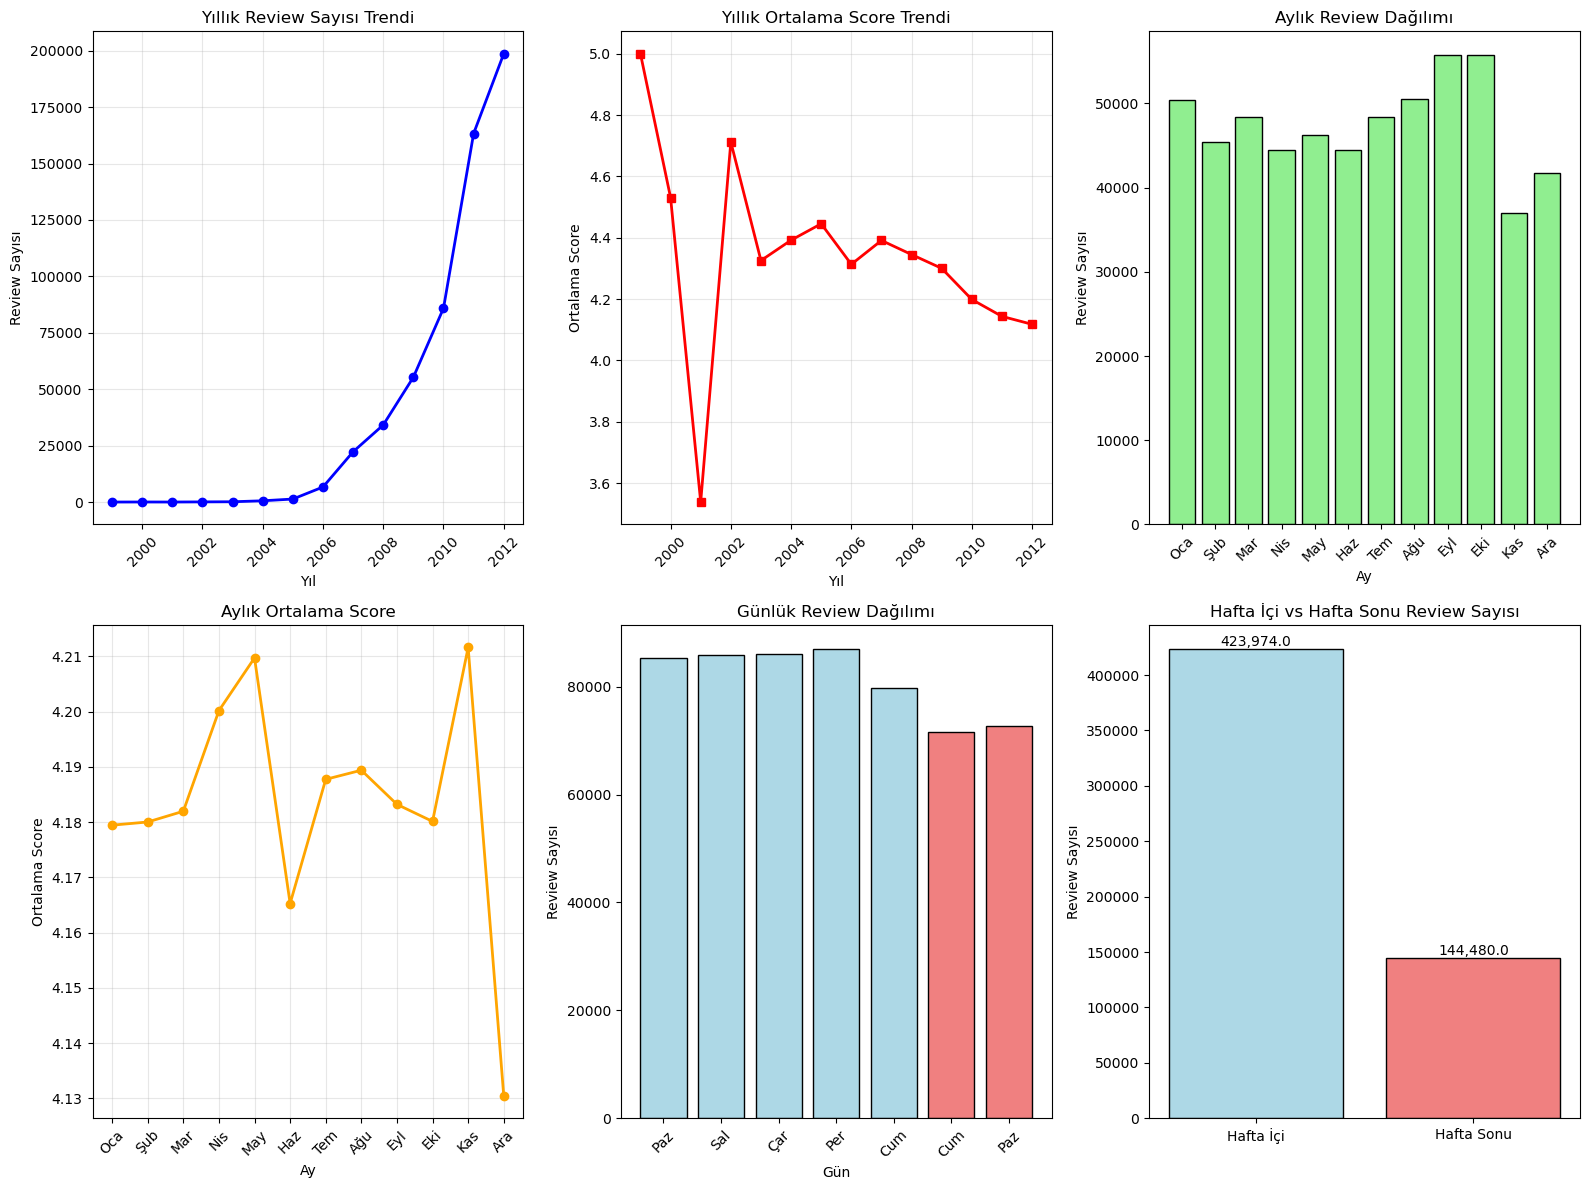


 ÖZET VE BULGULAR
----------------------------------------
 Temporal Insights:
   - En aktif yıl: 2012 (198,659 review)
   - En aktif ay: Ekim
   - Score trendi: Azalış (-0.882)
   - Hafta sonu etkisi: Pozitif (+0.046)


In [331]:
print("=" * 60)
print("TEMPORAL ANALYSIS - ZAMAN ANALİZİ")
print("=" * 60)


print("\n TARİH VERİSİ HAZIRLAMA")
print("-" * 40)

# Unix timestamp'i datetime'a çevir
data4['DateTime'] = pd.to_datetime(data4['Time'], unit='s')
data4['Year'] = data4['DateTime'].dt.year
data4['Month'] = data4['DateTime'].dt.month
data4['DayOfWeek'] = data4['DateTime'].dt.dayofweek  # 0=Monday, 6=Sunday
data4['DayName'] = data4['DateTime'].dt.day_name()

print(f"En eski review: {data4['DateTime'].min()}")
print(f"En yeni review: {data4['DateTime'].max()}")
print(f"Toplam zaman aralığı: {data4['DateTime'].max() - data4['DateTime'].min()}")


print("\n\n YILLIK REVIEW SAYISI TRENDİ")
print("-" * 40)

yearly_counts = data4['Year'].value_counts().sort_index()
print("Yıllık review sayıları:")
for year, count in yearly_counts.items():
    print(f"{year}: {count:,} review")

# Yıllık büyüme oranı
print(f"\nYıllık büyüme analizi:")
for i in range(1, len(yearly_counts)):
    current_year = yearly_counts.index[i]
    previous_year = yearly_counts.index[i-1]
    current_count = yearly_counts.iloc[i]
    previous_count = yearly_counts.iloc[i-1]
    growth_rate = ((current_count - previous_count) / previous_count) * 100
    print(f"{previous_year} -> {current_year}: %{growth_rate:+.1f}")


print("\n\n ZAMAN İÇİNDE ORTALAMA SCORE DEĞİŞİMİ")
print("-" * 40)

yearly_avg_score = data4.groupby('Year')['Score'].mean()
print("Yıllık ortalama score:")
for year, avg_score in yearly_avg_score.items():
    print(f"{year}: {avg_score:.3f}")

# Score trend analizi
score_trend = yearly_avg_score.iloc[-1] - yearly_avg_score.iloc[0]
print(f"\nGenel score trendi: {score_trend:+.3f} ({yearly_avg_score.iloc[0]:.3f} -> {yearly_avg_score.iloc[-1]:.3f})")

if score_trend > 0.1:
    print(" Score'lar genel olarak artış gösteriyor")
elif score_trend < -0.1:
    print(" Score'lar genel olarak azalış gösteriyor")
else:
    print(" Score'lar genel olarak stabil")

# ===== 4. MEVSIMSEL PATERNLER (AY BAZINDA) =====
print("\n\n MEVSIMSEL PATERNLER (AY BAZINDA)")
print("-" * 40)

monthly_counts = data4['Month'].value_counts().sort_index()
monthly_avg_score = data4.groupby('Month')['Score'].mean()

month_names = ['Ocak', 'Şubat', 'Mart', 'Nisan', 'Mayıs', 'Haziran',
               'Temmuz', 'Ağustos', 'Eylül', 'Ekim', 'Kasım', 'Aralık']

print("Aylık review sayıları ve ortalama score'lar:")
for month in range(1, 13):
    count = monthly_counts.get(month, 0)
    avg_score = monthly_avg_score.get(month, 0)
    print(f"{month_names[month-1]:<8}: {count:,} review, ortalama score: {avg_score:.3f}")

# En yoğun aylar
peak_month = monthly_counts.idxmax()
lowest_month = monthly_counts.idxmin()
print(f"\nEn yoğun ay: {month_names[peak_month-1]} ({monthly_counts[peak_month]:,} review)")
print(f"En az yoğun ay: {month_names[lowest_month-1]} ({monthly_counts[lowest_month]:,} review)")


print("\n\n HAFTA İÇİ VS HAFTA SONU PATTERNS")
print("-" * 40)

# Hafta içi (0-4) vs Hafta sonu (5-6)
data4['IsWeekend'] = data4['DayOfWeek'].isin([5, 6])  # Saturday=5, Sunday=6

weekday_counts = data4['DayName'].value_counts()
weekday_avg_score = data4.groupby('DayName')['Score'].mean()

# Gün isimleri sırası
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_names_tr = ['Pazartesi', 'Salı', 'Çarşamba', 'Perşembe', 'Cuma', 'Cumartesi', 'Pazar']

print("Günlük review patterns:")
for i, day in enumerate(day_order):
    count = weekday_counts.get(day, 0)
    avg_score = weekday_avg_score.get(day, 0)
    day_type = "Hafta sonu" if day in ['Saturday', 'Sunday'] else "Hafta içi"
    print(f"{day_names_tr[i]:<10}: {count:,} review, ortalama score: {avg_score:.3f} ({day_type})")

# Hafta içi vs hafta sonu karşılaştırması
weekend_stats = data4[data4['IsWeekend'] == True]['Score'].agg(['count', 'mean'])
weekday_stats = data4[data4['IsWeekend'] == False]['Score'].agg(['count', 'mean'])

print(f"\nHAFTA İÇİ vs HAFTA SONU KARŞILAŞTIRMA:")
print(f"Hafta içi: {weekday_stats['count']:,} review, ortalama score: {weekday_stats['mean']:.3f}")
print(f"Hafta sonu: {weekend_stats['count']:,} review, ortalama score: {weekend_stats['mean']:.3f}")

score_diff = weekend_stats['mean'] - weekday_stats['mean']
print(f"Score farkı (hafta sonu - hafta içi): {score_diff:+.3f}")


print("\n\n VİZUALİZASYON")
print("-" * 40)

plt.figure(figsize=(16, 12))

# Subplot 1: Yıllık Review Trendi
plt.subplot(2, 3, 1)
yearly_counts.plot(kind='line', marker='o', color='blue', linewidth=2, markersize=6)
plt.title('Yıllık Review Sayısı Trendi')
plt.xlabel('Yıl')
plt.ylabel('Review Sayısı')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Subplot 2: Yıllık Ortalama Score Trendi
plt.subplot(2, 3, 2)
yearly_avg_score.plot(kind='line', marker='s', color='red', linewidth=2, markersize=6)
plt.title('Yıllık Ortalama Score Trendi')
plt.xlabel('Yıl')
plt.ylabel('Ortalama Score')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Subplot 3: Aylık Review Dağılımı
plt.subplot(2, 3, 3)
monthly_counts_ordered = [monthly_counts.get(i, 0) for i in range(1, 13)]
plt.bar(range(1, 13), monthly_counts_ordered, color='lightgreen', edgecolor='black')
plt.title('Aylık Review Dağılımı')
plt.xlabel('Ay')
plt.ylabel('Review Sayısı')
plt.xticks(range(1, 13), [m[:3] for m in month_names], rotation=45)

# Subplot 4: Aylık Ortalama Score
plt.subplot(2, 3, 4)
monthly_score_ordered = [monthly_avg_score.get(i, 0) for i in range(1, 13)]
plt.plot(range(1, 13), monthly_score_ordered, marker='o', color='orange', linewidth=2, markersize=6)
plt.title('Aylık Ortalama Score')
plt.xlabel('Ay')
plt.ylabel('Ortalama Score')
plt.xticks(range(1, 13), [m[:3] for m in month_names], rotation=45)
plt.grid(True, alpha=0.3)

# Subplot 5: Günlük Review Dağılımı
plt.subplot(2, 3, 5)
daily_counts_ordered = [weekday_counts.get(day, 0) for day in day_order]
colors = ['lightblue' if day not in ['Saturday', 'Sunday'] else 'lightcoral' for day in day_order]
plt.bar(range(7), daily_counts_ordered, color=colors, edgecolor='black')
plt.title('Günlük Review Dağılımı')
plt.xlabel('Gün')
plt.ylabel('Review Sayısı')
plt.xticks(range(7), [d[:3] for d in day_names_tr], rotation=45)

# Subplot 6: Hafta içi vs Hafta sonu
plt.subplot(2, 3, 6)
weekend_comparison = [weekday_stats['count'], weekend_stats['count']]
plt.bar(['Hafta İçi', 'Hafta Sonu'], weekend_comparison, color=['lightblue', 'lightcoral'], edgecolor='black')
plt.title('Hafta İçi vs Hafta Sonu Review Sayısı')
plt.ylabel('Review Sayısı')
for i, v in enumerate(weekend_comparison):
    plt.text(i, v, f'{v:,}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("\n ÖZET VE BULGULAR")
print("-" * 40)
print(" Temporal Insights:")
print(f"   - En aktif yıl: {yearly_counts.idxmax()} ({yearly_counts.max():,} review)")
print(f"   - En aktif ay: {month_names[peak_month-1]}")
print(f"   - Score trendi: {'Artış' if score_trend > 0 else 'Azalış'} ({score_trend:+.3f})")
print(f"   - Hafta sonu etkisi: {'Pozitif' if score_diff > 0 else 'Negatif'} ({score_diff:+.3f})")

<a id = "6"></a><br>
## User Behavior Analysis
- Kullanıcı başına review sayısı dağılımı
- En aktif 20 kullanıcı analizi
- Kullanıcı score verme davranışı (her zaman 5 veren vs balanced) 
- Helpfulness ratio analizi

USER BEHAVIOR ANALYSIS - KULLANICI DAVRANIŞ ANALİZİ

 KULLANICI BAŞINA REVIEW SAYISI DAĞILIMI
--------------------------------------------------
Toplam unique kullanıcı sayısı: 256,059
Ortalama kullanıcı başına review: 2.22
Medyan kullanıcı başına review: 1.00
En çok review veren kullanıcı: 448 review
En az review veren kullanıcı: 1 review

Kullanıcı review dağılımı:
 1 review veren kullanıcı: 175,391 kişi (%68.5)
 2 review veren kullanıcı: 32,658 kişi (%12.8)
 3 review veren kullanıcı: 13,828 kişi (%5.4)
 4 review veren kullanıcı: 10,589 kişi (%4.1)
 5 review veren kullanıcı: 5,417 kişi (%2.1)
 6 review veren kullanıcı: 4,137 kişi (%1.6)
 7 review veren kullanıcı: 2,691 kişi (%1.1)
 8 review veren kullanıcı: 1,953 kişi (%0.8)
 9 review veren kullanıcı: 1,805 kişi (%0.7)
10 review veren kullanıcı: 1,231 kişi (%0.5)

10+ review veren kullanıcı: 7,590 (%3.0)
Bu kullanıcıların toplam review'ı: 141,294 (%24.9)


 EN AKTİF 20 KULLANICI ANALİZİ
-----------------------------------------------

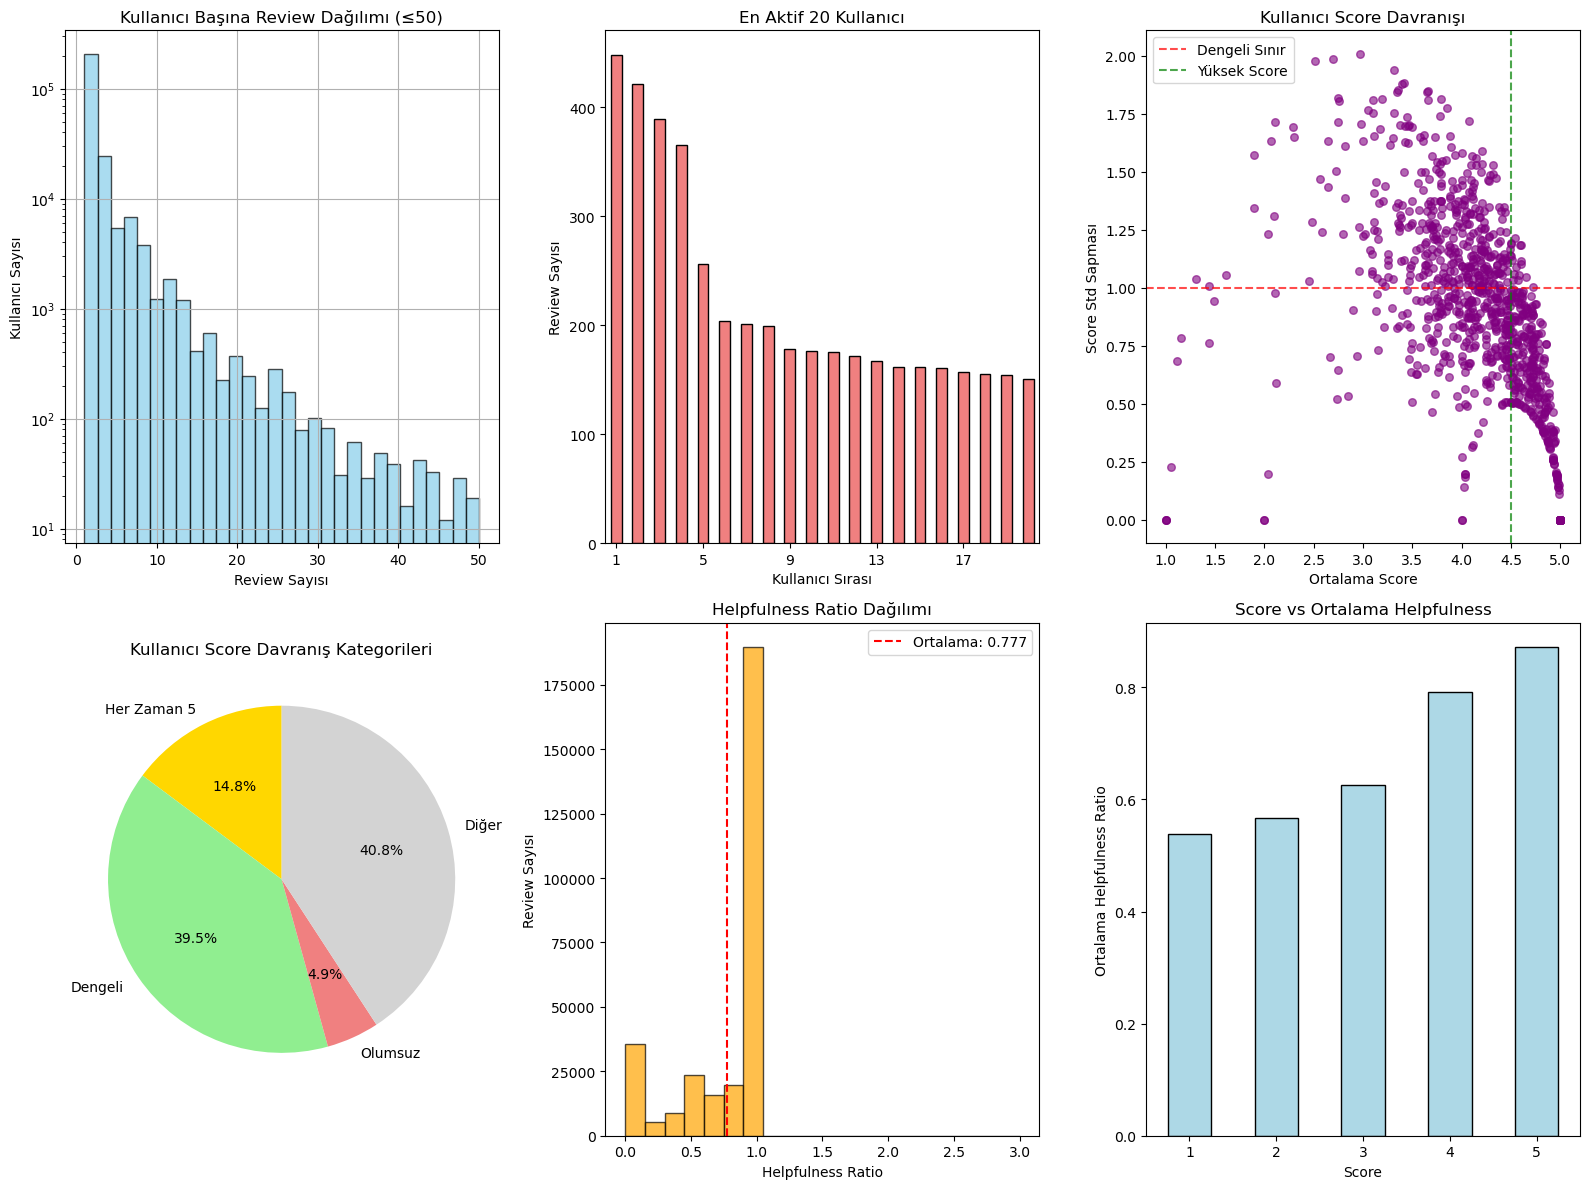


 ÖZET VE BULGULAR
--------------------------------------------------
 User Behavior Insights:
   - Toplam kullanıcı: 256,059
   - Aktif kullanıcı (10+ review): 7,590 (%3.0)
   - Her zaman 5 veren: 148 (%14.8)
   - Dengeli score veren: 395 (%39.5)
   - Ortalama helpfulness: 0.777
   - Score-Helpfulness korelasyon: 0.377


In [333]:
print("=" * 60)
print("USER BEHAVIOR ANALYSIS - KULLANICI DAVRANIŞ ANALİZİ")
print("=" * 60)

print("\n KULLANICI BAŞINA REVIEW SAYISI DAĞILIMI")
print("-" * 50)

user_review_counts = data4['UserId'].value_counts()
print(f"Toplam unique kullanıcı sayısı: {len(user_review_counts):,}")
print(f"Ortalama kullanıcı başına review: {user_review_counts.mean():.2f}")
print(f"Medyan kullanıcı başına review: {user_review_counts.median():.2f}")
print(f"En çok review veren kullanıcı: {user_review_counts.max():,} review")
print(f"En az review veren kullanıcı: {user_review_counts.min():,} review")

# Dağılım analizi
print(f"\nKullanıcı review dağılımı:")
review_distribution = user_review_counts.value_counts().head(10).sort_index()
for review_count, user_count in review_distribution.items():
    percentage = (user_count / len(user_review_counts)) * 100
    print(f"{review_count:2d} review veren kullanıcı: {user_count:,} kişi (%{percentage:.1f})")

# Yoğun kullanıcılar (10+ review)
heavy_users = user_review_counts[user_review_counts >= 10]
print(f"\n10+ review veren kullanıcı: {len(heavy_users):,} (%{(len(heavy_users)/len(user_review_counts))*100:.1f})")
print(f"Bu kullanıcıların toplam review'ı: {heavy_users.sum():,} (%{(heavy_users.sum()/len(data4))*100:.1f})")

print("\n\n EN AKTİF 20 KULLANICI ANALİZİ")
print("-" * 50)

top_20_users = user_review_counts.head(20)
print("En aktif 20 kullanıcı:")
for i, (user_id, review_count) in enumerate(top_20_users.items(), 1):
    # Kullanıcının ortalama score'u
    user_avg_score = data4[data4['UserId'] == user_id]['Score'].mean()
    print(f"{i:2d}. UserId: {user_id} | {review_count:,} review | Ort. Score: {user_avg_score:.2f}")

# Top 20 kullanıcıların toplam katkısı
top_20_contribution = (top_20_users.sum() / len(data4)) * 100
print(f"\nTop 20 kullanıcının toplam review katkısı: %{top_20_contribution:.1f}")
print("\n\n KULLANICI SCORE VERME DAVRANIŞI")
print("-" * 50)

# 10+ review veren kullanıcıları analiz et (performans için)
active_users = user_review_counts[user_review_counts >= 10].index[:1000]  # İlk 1000 aktif kullanıcı

user_behaviors = []
for user_id in active_users:
    user_scores = data4[data4['UserId'] == user_id]['Score']
    score_std = user_scores.std()
    score_mean = user_scores.mean()
    
    user_behaviors.append({
        'user_id': user_id,
        'review_count': len(user_scores),
        'mean_score': score_mean,
        'score_std': score_std
    })

user_behavior_df = pd.DataFrame(user_behaviors)

print(f"Analiz edilen aktif kullanıcı: {len(user_behavior_df):,}")

# Basit kategoriler
always_5_users = user_behavior_df[(user_behavior_df['score_std'] < 0.5) & (user_behavior_df['mean_score'] > 4.5)]
balanced_users = user_behavior_df[user_behavior_df['score_std'] > 1.0]
negative_users = user_behavior_df[user_behavior_df['mean_score'] < 3.0]

print(f"Her zaman 5 verenler: {len(always_5_users):,}")
print(f"Dengeli score verenler: {len(balanced_users):,}")
print(f"Olumsuz verenler: {len(negative_users):,}")
print(f"Ortalama score: {user_behavior_df['mean_score'].mean():.3f}")

print("\n\n HELPFULNESS RATIO ANALİZİ")
print("-" * 50)

# Helpfulness ratio hesapla (bölme sıfır hatası için kontrol)
data4['Helpfulness_Ratio'] = np.where(
    data4['HelpfulnessDenominator'] > 0,
    data4['HelpfulnessNumerator'] / data4['HelpfulnessDenominator'],
    np.nan
)

# Helpfulness verisi olan review'lar
helpfulness_data = data4[data4['HelpfulnessDenominator'] > 0].copy()
print(f"Helpfulness verisi olan review sayısı: {len(helpfulness_data):,}")
print(f"Toplam review'ların %{(len(helpfulness_data)/len(data4))*100:.1f}'inde helpfulness verisi var")

if len(helpfulness_data) > 0:
    print(f"\nHELPFULNESS İSTATİSTİKLERİ:")
    print(f"Ortalama helpfulness ratio: {helpfulness_data['Helpfulness_Ratio'].mean():.3f}")
    print(f"Medyan helpfulness ratio: {helpfulness_data['Helpfulness_Ratio'].median():.3f}")
    print(f"En yüksek helpfulness ratio: {helpfulness_data['Helpfulness_Ratio'].max():.3f}")
    
    # Helpfulness kategorileri
    very_helpful = (helpfulness_data['Helpfulness_Ratio'] >= 0.8).sum()
    moderately_helpful = ((helpfulness_data['Helpfulness_Ratio'] >= 0.5) & (helpfulness_data['Helpfulness_Ratio'] < 0.8)).sum()
    not_helpful = (helpfulness_data['Helpfulness_Ratio'] < 0.5).sum()
    
    print(f"\nHELPFULNESS KATEGORİLERİ:")
    print(f"Çok faydalı (>=0.8): {very_helpful:,} (%{(very_helpful/len(helpfulness_data))*100:.1f})")
    print(f"Orta faydalı (0.5-0.8): {moderately_helpful:,} (%{(moderately_helpful/len(helpfulness_data))*100:.1f})")
    print(f"Az faydalı (<0.5): {not_helpful:,} (%{(not_helpful/len(helpfulness_data))*100:.1f})")
    
    # Score ile helpfulness korelasyonu
    correlation = helpfulness_data['Score'].corr(helpfulness_data['Helpfulness_Ratio'])
    print(f"\nScore vs Helpfulness korelasyonu: {correlation:.4f}")
    
    # Kullanıcı bazında helpfulness analizi
    user_helpfulness = helpfulness_data.groupby('UserId').agg({
        'Helpfulness_Ratio': ['mean', 'count'],
        'Score': 'mean'
    }).round(3)
    
    user_helpfulness.columns = ['Avg_Helpfulness', 'Review_Count', 'Avg_Score']
    user_helpfulness = user_helpfulness[user_helpfulness['Review_Count'] >= 3]  # En az 3 review
    
    print(f"\n3+ helpful review'ı olan kullanıcı sayısı: {len(user_helpfulness):,}")
    print(f"Bu kullanıcıların ortalama helpfulness'ı: {user_helpfulness['Avg_Helpfulness'].mean():.3f}")

print("\n\n VİZUALİZASYON")
print("-" * 50)

plt.figure(figsize=(16, 12))

# Subplot 1: Kullanıcı başına review dağılımı (log scale)
plt.subplot(2, 3, 1)
review_dist_plot = user_review_counts[user_review_counts <= 50].hist(bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Kullanıcı Başına Review Dağılımı (≤50)')
plt.xlabel('Review Sayısı')
plt.ylabel('Kullanıcı Sayısı')
plt.yscale('log')

# Subplot 2: Top 20 kullanıcı
plt.subplot(2, 3, 2)
top_20_users.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('En Aktif 20 Kullanıcı')
plt.xlabel('Kullanıcı Sırası')
plt.ylabel('Review Sayısı')
plt.xticks(rotation=0)
plt.xticks(range(0, 20, 4), [f'{i+1}' for i in range(0, 20, 4)])

# Subplot 3: Score davranış dağılımı
plt.subplot(2, 3, 3)
if len(user_behavior_df) > 0:
    plt.scatter(user_behavior_df['mean_score'], user_behavior_df['score_std'], 
               alpha=0.6, color='purple', s=30)
    plt.title('Kullanıcı Score Davranışı')
    plt.xlabel('Ortalama Score')
    plt.ylabel('Score Std Sapması')
    plt.axhline(y=1.0, color='red', linestyle='--', alpha=0.7, label='Dengeli Sınır')
    plt.axvline(x=4.5, color='green', linestyle='--', alpha=0.7, label='Yüksek Score')
    plt.legend()

# Subplot 4: Score davranış kategorileri
plt.subplot(2, 3, 4)
if len(user_behavior_df) > 0:
    categories = ['Her Zaman 5', 'Dengeli', 'Olumsuz', 'Diğer']
    other_users = len(user_behavior_df) - len(always_5_users) - len(balanced_users) - len(negative_users)
    category_counts = [len(always_5_users), len(balanced_users), len(negative_users), other_users]
    colors = ['gold', 'lightgreen', 'lightcoral', 'lightgray']
    
    plt.pie(category_counts, labels=categories, colors=colors, autopct='%1.1f%%', startangle=90)
    plt.title('Kullanıcı Score Davranış Kategorileri')

# Subplot 5: Helpfulness dağılımı
plt.subplot(2, 3, 5)
if len(helpfulness_data) > 0:
    plt.hist(helpfulness_data['Helpfulness_Ratio'], bins=20, alpha=0.7, color='orange', edgecolor='black')
    plt.title('Helpfulness Ratio Dağılımı')
    plt.xlabel('Helpfulness Ratio')
    plt.ylabel('Review Sayısı')
    plt.axvline(helpfulness_data['Helpfulness_Ratio'].mean(), color='red', linestyle='--', 
                label=f'Ortalama: {helpfulness_data["Helpfulness_Ratio"].mean():.3f}')
    plt.legend()

# Subplot 6: Score vs Helpfulness
plt.subplot(2, 3, 6)
if len(helpfulness_data) > 0:
    score_helpfulness = helpfulness_data.groupby('Score')['Helpfulness_Ratio'].mean()
    score_helpfulness.plot(kind='bar', color='lightblue', edgecolor='black')
    plt.title('Score vs Ortalama Helpfulness')
    plt.xlabel('Score')
    plt.ylabel('Ortalama Helpfulness Ratio')
    plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

print("\n ÖZET VE BULGULAR")
print("-" * 50)
print(" User Behavior Insights:")
print(f"   - Toplam kullanıcı: {len(user_review_counts):,}")
print(f"   - Aktif kullanıcı (10+ review): {len(heavy_users):,} (%{(len(heavy_users)/len(user_review_counts))*100:.1f})")
if len(user_behavior_df) > 0:
    print(f"   - Her zaman 5 veren: {len(always_5_users):,} (%{(len(always_5_users)/len(user_behavior_df))*100:.1f})")
    print(f"   - Dengeli score veren: {len(balanced_users):,} (%{(len(balanced_users)/len(user_behavior_df))*100:.1f})")
if len(helpfulness_data) > 0:
    print(f"   - Ortalama helpfulness: {helpfulness_data['Helpfulness_Ratio'].mean():.3f}")
    print(f"   - Score-Helpfulness korelasyon: {correlation:.3f}")


<a id = "7"></a><br>
## Product Analysis
- En çok review alan 20 ürün
- Ürün başına ortalama score dağılımı
- Review sayısı ile ortalama score korelasyonu

PRODUCT ANALYSIS - ÜRÜN ANALİZİ

 GENEL ÜRÜN İSTATİSTİKLERİ
--------------------------------------------------
Toplam unique ürün sayısı: 74,258
Ortalama ürün başına review: 7.66
Medyan ürün başına review: 2.00
En çok review alan ürün: 913 review
En az review alan ürün: 1 review

ÜRÜN REVIEW DAĞILIMI:
 1 review alan ürün: 30,408 adet (%40.9)
 2 review alan ürün: 12,262 adet (%16.5)
 3 review alan ürün: 6,849 adet (%9.2)
 4 review alan ürün: 4,324 adet (%5.8)
 5 review alan ürün: 3,105 adet (%4.2)
 6 review alan ürün: 2,237 adet (%3.0)
 7 review alan ürün: 1,841 adet (%2.5)
 8 review alan ürün: 1,424 adet (%1.9)
 9 review alan ürün: 1,189 adet (%1.6)
10 review alan ürün: 1,001 adet (%1.3)

10+ review alan ürün: 10,619 (%14.3)
Bu ürünlerin toplam review'ı: 411,752 (%72.4)


 EN ÇOK REVIEW ALAN 20 ÜRÜN
--------------------------------------------------
En çok review alan 20 ürün:
 1. ProductId: B007JFMH8M
    Review Sayısı: 913
    Ortalama Score: 4.58
    Score Std: 0.71

 2. ProductId: 

/var/folders/f1/wsljqfs12bnfxs4yzjv258w40000gn/T/ipykernel_74177/2232040866.py:117: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_stats = product_analysis.groupby('Review_Group')['Avg_Score'].agg(['mean', 'count', 'std']).round(3)


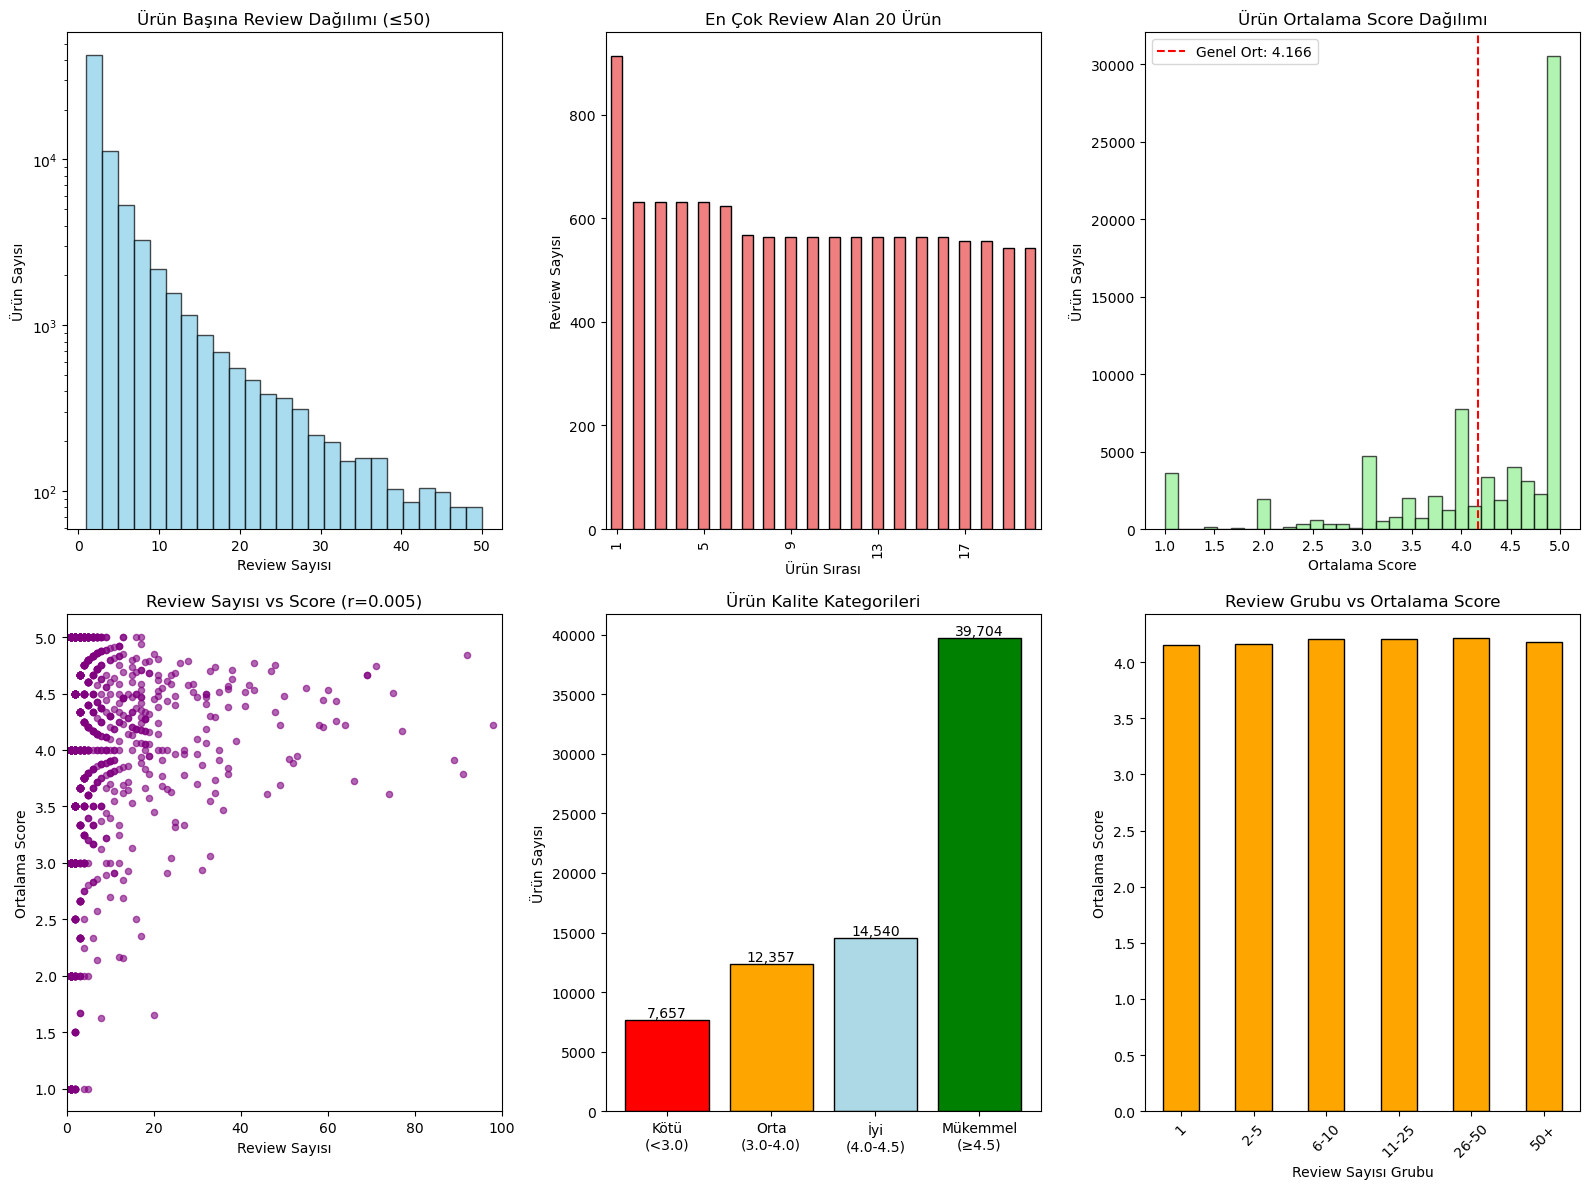


 ÖZET VE BULGULAR
--------------------------------------------------
 Product Analysis Insights:
   - Toplam ürün: 74,258
   - Popüler ürün (10+ review): 10,619 (%14.3)
   - Mükemmel ürün (≥4.5 score): 39,704 (%53.5)
   - Review-Score korelasyon: 0.005
   - Hem popüler hem kaliteli: 1,487 ürün
   - Top 20 ürün toplam katkı: %2.1


In [335]:
print("=" * 60)
print("PRODUCT ANALYSIS - ÜRÜN ANALİZİ")
print("=" * 60)

print("\n GENEL ÜRÜN İSTATİSTİKLERİ")
print("-" * 50)

product_review_counts = data4['ProductId'].value_counts()
product_avg_scores = data4.groupby('ProductId')['Score'].mean()

print(f"Toplam unique ürün sayısı: {len(product_review_counts):,}")
print(f"Ortalama ürün başına review: {product_review_counts.mean():.2f}")
print(f"Medyan ürün başına review: {product_review_counts.median():.2f}")
print(f"En çok review alan ürün: {product_review_counts.max():,} review")
print(f"En az review alan ürün: {product_review_counts.min():,} review")

# Ürün review dağılımı
print(f"\nÜRÜN REVIEW DAĞILIMI:")
review_distribution = product_review_counts.value_counts().head(10).sort_index()
for review_count, product_count in review_distribution.items():
    percentage = (product_count / len(product_review_counts)) * 100
    print(f"{review_count:2d} review alan ürün: {product_count:,} adet (%{percentage:.1f})")

# Popüler ürünler (10+ review)
popular_products = product_review_counts[product_review_counts >= 10]
print(f"\n10+ review alan ürün: {len(popular_products):,} (%{(len(popular_products)/len(product_review_counts))*100:.1f})")
print(f"Bu ürünlerin toplam review'ı: {popular_products.sum():,} (%{(popular_products.sum()/len(data4))*100:.1f})")

print("\n\n EN ÇOK REVIEW ALAN 20 ÜRÜN")
print("-" * 50)

top_20_products = product_review_counts.head(20)
print("En çok review alan 20 ürün:")

for i, (product_id, review_count) in enumerate(top_20_products.items(), 1):
    # Ürünün ortalama score'u
    product_avg_score = data4[data4['ProductId'] == product_id]['Score'].mean()
    # Ürünün score dağılımı
    product_scores = data4[data4['ProductId'] == product_id]['Score']
    score_std = product_scores.std()
    
    print(f"{i:2d}. ProductId: {product_id}")
    print(f"    Review Sayısı: {review_count:,}")
    print(f"    Ortalama Score: {product_avg_score:.2f}")
    print(f"    Score Std: {score_std:.2f}")
    print()

# Top 20 ürünlerin toplam katkısı
top_20_contribution = (top_20_products.sum() / len(data4)) * 100
print(f"Top 20 ürünün toplam review katkısı: %{top_20_contribution:.1f}")

print("\n\n ÜRÜN BAŞINA ORTALAMA SCORE DAĞILIMI")
print("-" * 50)

print(f"Ürün ortalama score istatistikleri:")
print(f"Min ortalama score: {product_avg_scores.min():.3f}")
print(f"Max ortalama score: {product_avg_scores.max():.3f}")
print(f"Genel ortalama score: {product_avg_scores.mean():.3f}")
print(f"Medyan ortalama score: {product_avg_scores.median():.3f}")
print(f"Score std sapması: {product_avg_scores.std():.3f}")

# Score dağılım kategorileri
excellent_products = (product_avg_scores >= 4.5).sum()
good_products = ((product_avg_scores >= 4.0) & (product_avg_scores < 4.5)).sum()
average_products = ((product_avg_scores >= 3.0) & (product_avg_scores < 4.0)).sum()
poor_products = (product_avg_scores < 3.0).sum()

print(f"\nÜRÜN KALİTE KATEGORİLERİ:")
print(f"Mükemmel (≥4.5): {excellent_products:,} ürün (%{(excellent_products/len(product_avg_scores))*100:.1f})")
print(f"İyi (4.0-4.5): {good_products:,} ürün (%{(good_products/len(product_avg_scores))*100:.1f})")
print(f"Orta (3.0-4.0): {average_products:,} ürün (%{(average_products/len(product_avg_scores))*100:.1f})")
print(f"Kötü (<3.0): {poor_products:,} ürün (%{(poor_products/len(product_avg_scores))*100:.1f})")

# En iyi ve en kötü ürünler
best_products = product_avg_scores.nlargest(10)
worst_products = product_avg_scores.nsmallest(10)

print(f"\nEN İYİ 10 ÜRÜN (Ortalama Score):")
for i, (product_id, avg_score) in enumerate(best_products.items(), 1):
    review_count = product_review_counts[product_id]
    print(f"{i:2d}. {product_id}: {avg_score:.3f} ({review_count:,} review)")

print(f"\nEN KÖTÜ 10 ÜRÜN (Ortalama Score):")
for i, (product_id, avg_score) in enumerate(worst_products.items(), 1):
    review_count = product_review_counts[product_id]
    print(f"{i:2d}. {product_id}: {avg_score:.3f} ({review_count:,} review)")

print("\n\n REVIEW SAYISI İLE ORTALAMA SCORE KORELASYONU")
print("-" * 50)

# Her ürün için review sayısı ve ortalama score'u birleştir
product_analysis = pd.DataFrame({
    'ProductId': product_review_counts.index,
    'Review_Count': product_review_counts.values,
    'Avg_Score': product_avg_scores[product_review_counts.index].values
})

# Korelasyon hesapla
correlation = product_analysis['Review_Count'].corr(product_analysis['Avg_Score'])
print(f"Review Sayısı vs Ortalama Score korelasyonu: {correlation:.4f}")

if correlation > 0.1:
    print(" Pozitif korelasyon: Daha çok review alan ürünler daha yüksek score'a sahip")
elif correlation < -0.1:
    print(" Negatif korelasyon: Daha çok review alan ürünler daha düşük score'a sahip")
else:
    print(" Zayıf korelasyon: Review sayısı ile score arasında güçlü ilişki yok")

# Review sayısı gruplarına göre ortalama score
print(f"\nREVIEW SAYISI GRUPARINA GÖRE ORTALAMA SCORE:")

# Review sayısına göre grupla
product_analysis['Review_Group'] = pd.cut(product_analysis['Review_Count'], 
                                        bins=[0, 1, 5, 10, 25, 50, np.inf], 
                                        labels=['1', '2-5', '6-10', '11-25', '26-50', '50+'])

group_stats = product_analysis.groupby('Review_Group')['Avg_Score'].agg(['mean', 'count', 'std']).round(3)
group_stats.columns = ['Ortalama_Score', 'Ürün_Sayısı', 'Std_Sapma']

for group, stats in group_stats.iterrows():
    print(f"{group:>6} review: {stats['Ortalama_Score']:.3f} score ({stats['Ürün_Sayısı']:,} ürün)")

# Popüler ve kaliteli ürünler (hem çok review hem yüksek score)
popular_and_good = product_analysis[(product_analysis['Review_Count'] >= 20) & 
                                   (product_analysis['Avg_Score'] >= 4.5)]
print(f"\nPOPÜLER VE KALİTELİ ÜRÜNLER (20+ review, 4.5+ score):")
print(f"Toplam {len(popular_and_good):,} ürün bu kriterleri sağlıyor")

if len(popular_and_good) > 0:
    print("En popüler ve kaliteli 10 ürün:")
    top_popular_good = popular_and_good.nlargest(10, 'Review_Count')
    for i, (_, row) in enumerate(top_popular_good.iterrows(), 1):
        print(f"{i:2d}. {row['ProductId']}: {row['Avg_Score']:.3f} score, {row['Review_Count']:,} review")

print("\n\n VİZUALİZASYON")
print("-" * 50)

plt.figure(figsize=(16, 12))

# Subplot 1: Ürün başına review dağılımı
plt.subplot(2, 3, 1)
review_dist = product_review_counts[product_review_counts <= 50]
plt.hist(review_dist, bins=25, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Ürün Başına Review Dağılımı (≤50)')
plt.xlabel('Review Sayısı')
plt.ylabel('Ürün Sayısı')
plt.yscale('log')

# Subplot 2: Top 20 ürün review sayıları
plt.subplot(2, 3, 2)
top_20_products.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('En Çok Review Alan 20 Ürün')
plt.xlabel('Ürün Sırası')
plt.ylabel('Review Sayısı')
plt.xticks(range(0, 20, 4), [f'{i+1}' for i in range(0, 20, 4)])

# Subplot 3: Ürün ortalama score dağılımı
plt.subplot(2, 3, 3)
plt.hist(product_avg_scores, bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
plt.title('Ürün Ortalama Score Dağılımı')
plt.xlabel('Ortalama Score')
plt.ylabel('Ürün Sayısı')
plt.axvline(product_avg_scores.mean(), color='red', linestyle='--', 
            label=f'Genel Ort: {product_avg_scores.mean():.3f}')
plt.legend()

# Subplot 4: Review sayısı vs Ortalama score scatter
plt.subplot(2, 3, 4)
sample_products = product_analysis.sample(min(2000, len(product_analysis)))  # Performance için sample
plt.scatter(sample_products['Review_Count'], sample_products['Avg_Score'], 
           alpha=0.6, color='purple', s=20)
plt.title(f'Review Sayısı vs Score (r={correlation:.3f})')
plt.xlabel('Review Sayısı')
plt.ylabel('Ortalama Score')
plt.xlim(0, 100)  # Readability için limit

# Subplot 5: Ürün kalite kategorileri
plt.subplot(2, 3, 5)
categories = ['Kötü\n(<3.0)', 'Orta\n(3.0-4.0)', 'İyi\n(4.0-4.5)', 'Mükemmel\n(≥4.5)']
category_counts = [poor_products, average_products, good_products, excellent_products]
colors = ['red', 'orange', 'lightblue', 'green']

plt.bar(categories, category_counts, color=colors, edgecolor='black')
plt.title('Ürün Kalite Kategorileri')
plt.ylabel('Ürün Sayısı')
for i, v in enumerate(category_counts):
    plt.text(i, v, f'{v:,}', ha='center', va='bottom')

# Subplot 6: Review grubu bazında ortalama score
plt.subplot(2, 3, 6)
group_stats['Ortalama_Score'].plot(kind='bar', color='orange', edgecolor='black')
plt.title('Review Grubu vs Ortalama Score')
plt.xlabel('Review Sayısı Grubu')
plt.ylabel('Ortalama Score')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print("\n ÖZET VE BULGULAR")
print("-" * 50)
print(" Product Analysis Insights:")
print(f"   - Toplam ürün: {len(product_review_counts):,}")
print(f"   - Popüler ürün (10+ review): {len(popular_products):,} (%{(len(popular_products)/len(product_review_counts))*100:.1f})")
print(f"   - Mükemmel ürün (≥4.5 score): {excellent_products:,} (%{(excellent_products/len(product_avg_scores))*100:.1f})")
print(f"   - Review-Score korelasyon: {correlation:.3f}")
if len(popular_and_good) > 0:
    print(f"   - Hem popüler hem kaliteli: {len(popular_and_good):,} ürün")
print(f"   - Top 20 ürün toplam katkı: %{top_20_contribution:.1f}")

<a id = "8"></a><br>
## Text Preprocessing ve Feature Engineering


<a id = "9"></a><br>
##  Data Cleaning
- HTML tag'lerinin temizlenmesi
- URL ve email adreslerinin kaldırılması 
- Özel karakterlerin normalize edilmesi 
- Encoding problemlerinin çözülmesi

In [338]:
import re
import string

print("=" * 60)
print("TEXT PREPROCESSING - DATA CLEANING")
print("=" * 60)

# Sample ile çalışalım (performans için)
sample_size = 10000
data_sample = data4.sample(sample_size, random_state=42).copy()
print(f"Sample size: {len(data_sample):,} review")

print("\n ORIJINAL TEXT ÖRNEKLERI")
print("-" * 40)
print("İlk 3 text örneği:")
for i in range(3):
    print(f"\nÖrnek {i+1}:")
    print(f"Text: {data_sample.iloc[i]['Text'][:200]}...")

print("\n\n HTML TAG TEMIZLEME")
print("-" * 40)

def clean_html_tags(text):
    """HTML tag'lerini temizle"""
    if pd.isna(text):
        return ""
    # HTML tag'lerini kaldır
    clean_text = re.sub(r'<[^>]+>', '', str(text))
    # HTML entity'lerini temizle
    clean_text = re.sub(r'&[a-zA-Z]+;', ' ', clean_text)
    return clean_text

# HTML tag kontrolü
html_pattern = r'<[^>]+>'
html_count = data_sample['Text'].astype(str).str.contains(html_pattern).sum()
print(f"HTML tag içeren review sayısı: {html_count}")

# HTML temizleme uygula
data_sample['Text_Clean_HTML'] = data_sample['Text'].apply(clean_html_tags)

# Örnek göster
if html_count > 0:
    html_example = data_sample[data_sample['Text'].astype(str).str.contains(html_pattern)].iloc[0]
    print(f"\nHTML Örneği:")
    print(f"Önce: {html_example['Text'][:150]}...")
    print(f"Sonra: {html_example['Text_Clean_HTML'][:150]}...")

print("\n\n URL VE EMAIL TEMIZLEME")
print("-" * 40)

def clean_urls_emails(text):
    """URL ve email adreslerini temizle"""
    if pd.isna(text):
        return ""
    text = str(text)
    # URL'leri temizle
    text = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ', text)
    text = re.sub(r'www\.(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ', text)
    # Email'leri temizle
    text = re.sub(r'\S+@\S+\.\S+', ' ', text)
    return text

# URL/Email kontrolü
url_pattern = r'http[s]?://|www\.'
email_pattern = r'\S+@\S+\.\S+'

url_count = data_sample['Text_Clean_HTML'].astype(str).str.contains(url_pattern).sum()
email_count = data_sample['Text_Clean_HTML'].astype(str).str.contains(email_pattern).sum()

print(f"URL içeren review sayısı: {url_count}")
print(f"Email içeren review sayısı: {email_count}")

# URL/Email temizleme uygula
data_sample['Text_Clean_URL'] = data_sample['Text_Clean_HTML'].apply(clean_urls_emails)

print("\n\n ÖZEL KARAKTER NORMALIZE")
print("-" * 40)

def normalize_special_chars(text):
    """Özel karakterleri normalize et"""
    if pd.isna(text):
        return ""
    text = str(text)
    
    # Çoklu boşlukları tek boşluğa çevir
    text = re.sub(r'\s+', ' ', text)
    
    # Noktalama işaretlerini normalize et
    text = re.sub(r'[!]{2,}', '!', text)  # Çoklu ünlem
    text = re.sub(r'[?]{2,}', '?', text)  # Çoklu soru
    text = re.sub(r'[.]{3,}', '...', text)  # Çoklu nokta
    
    # Özel karakterleri temizle (ama noktalama kalsın)
    text = re.sub(r'[^\w\s\.\,\!\?\;\:\-\'\"]', ' ', text)
    
    # Başta/sonda boşluk temizle
    text = text.strip()
    
    return text

# Özel karakter sayısı
special_char_pattern = r'[^\w\s\.\,\!\?\;\:\-\'\"]'
special_count = data_sample['Text_Clean_URL'].astype(str).str.contains(special_char_pattern).sum()
print(f"Özel karakter içeren review sayısı: {special_count}")

# Normalize uygula
data_sample['Text_Clean_Chars'] = data_sample['Text_Clean_URL'].apply(normalize_special_chars)

print("\n\n ENCODING PROBLEM ÇÖZME")
print("-" * 40)

def fix_encoding_issues(text):
    """Yaygın encoding problemlerini düzelt"""
    if pd.isna(text):
        return ""
    text = str(text)
    
    # Yaygın encoding problemleri
    encoding_fixes = {
        'â€™': "'",     # apostrophe
        'â€œ': '"',     # left quote
        'â€': '"',      # right quote
        'â€"': '-',     # dash
        'Ã¡': 'á',     # á
        'Ã©': 'é',     # é
        'Ã­': 'í',     # í
        'Ã³': 'ó',     # ó
        'Ãº': 'ú',     # ú
        'Ã±': 'ñ',     # ñ
    }
    
    for problem, fix in encoding_fixes.items():
        text = text.replace(problem, fix)
    
    return text

# Encoding problem kontrolü
encoding_patterns = ['â€', 'Ã¡', 'Ã©', 'Ã­', 'Ã³', 'Ãº', 'Ã±']
encoding_count = 0
for pattern in encoding_patterns:
    encoding_count += data_sample['Text_Clean_Chars'].astype(str).str.contains(pattern).sum()

print(f"Encoding problemi olan review sayısı: {encoding_count}")

# Encoding düzeltme uygula
data_sample['Text_Final'] = data_sample['Text_Clean_Chars'].apply(fix_encoding_issues)

print("\n\n TEMİZLEME SONUÇLARI")
print("-" * 40)

# Uzunluk karşılaştırması
original_lengths = data_sample['Text'].astype(str).str.len()
final_lengths = data_sample['Text_Final'].str.len()

print(f"Ortalama uzunluk değişimi:")
print(f"Önce: {original_lengths.mean():.1f} karakter")
print(f"Sonra: {final_lengths.mean():.1f} karakter")
print(f"Değişim: {((final_lengths.mean() - original_lengths.mean())/original_lengths.mean())*100:+.1f}%")

# Boş text kontrolü
empty_count = (data_sample['Text_Final'].str.len() == 0).sum()
print(f"\nBoş hale gelen text sayısı: {empty_count}")

# Örnek karşılaştırma
print(f"\nTEMİZLEME ÖRNEĞİ:")
sample_idx = 0
print(f"ÖNCE: {data_sample.iloc[sample_idx]['Text'][:200]}...")
print(f"SONRA: {data_sample.iloc[sample_idx]['Text_Final'][:200]}...")

print(f"\n ÖZET")
print("-" * 40)
print(f" HTML tag'ler temizlendi ({html_count} review)")
print(f" URL'ler temizlendi ({url_count} review)")
print(f" Email'ler temizlendi ({email_count} review)")
print(f" Özel karakterler normalize edildi ({special_count} review)")
print(f" Encoding problemleri düzeltildi ({encoding_count} review)")
print(f" Temizlenmiş text: 'Text_Final' sütununda")


TEXT PREPROCESSING - DATA CLEANING
Sample size: 10,000 review

 ORIJINAL TEXT ÖRNEKLERI
----------------------------------------
İlk 3 text örneği:

Örnek 1:
Text: Having tried a couple of other brands of gluten-free sandwich cookies, these are the best of the bunch.  They're crunchy and true to the texture of the other "real" cookies that aren't gluten-free.  S...

Örnek 2:
Text: My cat loves these treats. If ever I can't find her in the house, I just pop the top and she bolts out of wherever she was hiding to come get a treat. She doesn't like crunchy treats much, so these ar...

Örnek 3:
Text: A little less than I expected.  It tends to have a muddy taste - not what I expected since they said it was the favorite of the company....


 HTML TAG TEMIZLEME
----------------------------------------
HTML tag içeren review sayısı: 2573

HTML Örneği:
Önce: First there was Frosted Mini-Wheats, in original size, then there was Frosted Mini-Wheats Bite Size. Well, if for some reason those were 

<a id = "10"></a><br>
##  Text Preprocessing Pipeline
- Case Normalization: Tüm metni lowercase'e çevirme 
- Tokenization: Metni kelimelerine ayırma
- Stopwords Removal: Anlamsız kelimeleri çıkarma (en, the, and, vs.) 
- Punctuation Handling: Noktalama işaretlerinin işlenmesi
- Number Handling: Sayıların işlenmesi (kaldırma/normalize etme) 
- Lemmatization: Kelimeleri kök formlarına çevirme
- Negation Handling: "not good" gibi olumsuzlukların işlenmesi


In [340]:
print("=" * 60)
print("TEXT PREPROCESSING PIPELINE")
print("=" * 60)

# Sample ile çalışalım (performans için)
sample_size = 5000
data_sample = data4.sample(sample_size, random_state=42).copy()
print(f"Sample size: {len(data_sample):,} review")

# ===== PREPROCESSING PIPELINE FONKSIYONU =====
def text_preprocessing_pipeline(text):
    """Kapsamlı text preprocessing pipeline"""
    if pd.isna(text):
        return ""
    
    text = str(text)
    original_text = text
    
    # 1. CASE NORMALIZATION - Lowercase'e çevir
    text = text.lower()
    
    # 2. NEGATION HANDLING - Önce negation'ları handle et
    # "not good" -> "not_good" gibi
    negation_patterns = [
        r"\bnot\s+(\w+)", r"\bno\s+(\w+)", r"\bnever\s+(\w+)",
        r"\bwon't\s+(\w+)", r"\bcan't\s+(\w+)", r"\bdoesn't\s+(\w+)",
        r"\bdon't\s+(\w+)", r"\bwasn't\s+(\w+)", r"\bweren't\s+(\w+)",
        r"\bisn't\s+(\w+)", r"\baren't\s+(\w+)"
    ]
    
    for pattern in negation_patterns:
        text = re.sub(pattern, r"not_\1", text)
    
    # 3. NUMBER HANDLING - Sayıları normalize et
    # Sayıları kategorize et: küçük sayılar kalsın, büyük sayıları genel terimle değiştir
    text = re.sub(r'\b\d{5,}\b', 'LARGE_NUMBER', text)  # 5+ basamaklı sayılar
    text = re.sub(r'\$\d+', 'PRICE', text)  # Para birimi
    text = re.sub(r'\d+\.\d+', 'DECIMAL', text)  # Ondalık sayılar
    
    # 4. PUNCTUATION HANDLING - Önemli noktalama koru, gereksizleri kaldır
    # Önemli emoticon'ları koru
    text = re.sub(r':\)', ' HAPPY ', text)
    text = re.sub(r':\(', ' SAD ', text)
    text = re.sub(r':D', ' VERY_HAPPY ', text)
    
    # Noktalama işaretlerini kaldır
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # 5. TOKENIZATION - Kelimelere ayır
    tokens = word_tokenize(text)
    
    # 6. STOPWORDS REMOVAL - Anlamsız kelimeleri çıkar
    stop_words = set(stopwords.words('english'))
    # Önemli negation kelimelerini stopword'lerden çıkar
    important_words = {'not', 'no', 'never', 'nothing', 'none', 'nobody', 'nowhere'}
    stop_words = stop_words - important_words
    
    tokens = [token for token in tokens if token.lower() not in stop_words]
    
    # 7. LEMMATIZATION - Kelimeleri kök forma çevir
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # 8. Final cleaning - Çok kısa kelimeleri ve gereksizleri temizle
    tokens = [token for token in tokens if len(token) > 2 and token.isalpha()]
    
    return ' '.join(tokens)

# ===== PIPELINE'I UYGULA =====
print("\n PREPROCESSING PIPELINE UYGULANMASI")
print("-" * 50)

print("Pipeline adımları:")
print("✓ Case Normalization")
print("✓ Negation Handling") 
print("✓ Number Handling")
print("✓ Punctuation Handling")
print("✓ Tokenization")
print("✓ Stopwords Removal")
print("✓ Lemmatization")

# Sample'a uygula
print(f"\nProcessing {len(data_sample)} reviews...")
data_sample['Text_Processed'] = data_sample['Text'].apply(text_preprocessing_pipeline)

# ===== ADIM ADIM ÖRNEK =====
print("\n\n ADIM ADIM PREPROCESSING ÖRNEĞİ")
print("-" * 50)

# Örnek text seç
example_idx = 0
example_text = data_sample.iloc[example_idx]['Text']

print(f"ORİJİNAL TEXT:")
print(f"{example_text}")

# Her adımı göster
def show_preprocessing_steps(text):
    """Preprocessing adımlarını göster"""
    print(f"\n1. Case Normalization:")
    text = str(text).lower()
    print(f"{text[:150]}...")
    
    print(f"\n2. Negation Handling:")
    negation_patterns = [r"\bnot\s+(\w+)", r"\bno\s+(\w+)", r"\bdoesn't\s+(\w+)", r"\bdon't\s+(\w+)"]
    for pattern in negation_patterns:
        text = re.sub(pattern, r"not_\1", text)
    print(f"{text[:150]}...")
    
    print(f"\n3. Number Handling:")
    text = re.sub(r'\b\d{5,}\b', 'LARGE_NUMBER', text)
    text = re.sub(r'\$\d+', 'PRICE', text)
    print(f"{text[:150]}...")
    
    print(f"\n4. Punctuation Handling:")
    text = text.translate(str.maketrans('', '', string.punctuation))
    print(f"{text[:150]}...")
    
    print(f"\n5. Tokenization:")
    tokens = word_tokenize(text)
    print(f"İlk 20 token: {tokens[:20]}")
    
    print(f"\n6. Stopwords Removal:")
    stop_words = set(stopwords.words('english'))
    tokens_no_stop = [token for token in tokens if token.lower() not in stop_words]
    print(f"İlk 20 token (stopword'siz): {tokens_no_stop[:20]}")
    
    print(f"\n7. Lemmatization:")
    lemmatizer = WordNetLemmatizer()
    tokens_lemma = [lemmatizer.lemmatize(token) for token in tokens_no_stop]
    print(f"İlk 20 token (lemmatized): {tokens_lemma[:20]}")
    
    return ' '.join(tokens_lemma)

show_preprocessing_steps(example_text)

print(f"\n\nFİNAL PROCESSED TEXT:")
print(f"{data_sample.iloc[example_idx]['Text_Processed']}")

# ===== İSTATİSTİKLER =====
print("\n\n PREPROCESSING İSTATİSTİKLERİ")
print("-" * 50)

# Uzunluk karşılaştırması
original_lengths = data_sample['Text'].astype(str).str.len()
processed_lengths = data_sample['Text_Processed'].str.len()

print(f"UZUNLUK KARŞILAŞTIRMASI:")
print(f"Ortalama orijinal uzunluk: {original_lengths.mean():.1f} karakter")
print(f"Ortalama processed uzunluk: {processed_lengths.mean():.1f} karakter")
print(f"Uzunluk değişimi: {((processed_lengths.mean() - original_lengths.mean())/original_lengths.mean())*100:+.1f}%")

# Kelime sayısı karşılaştırması
original_word_counts = data_sample['Text'].astype(str).str.split().str.len()
processed_word_counts = data_sample['Text_Processed'].str.split().str.len()

print(f"\nKELİME SAYISI KARŞILAŞTIRMASI:")
print(f"Ortalama orijinal kelime sayısı: {original_word_counts.mean():.1f}")
print(f"Ortalama processed kelime sayısı: {processed_word_counts.mean():.1f}")
print(f"Kelime sayısı değişimi: {((processed_word_counts.mean() - original_word_counts.mean())/original_word_counts.mean())*100:+.1f}%")

# Boş text kontrolü
empty_count = (data_sample['Text_Processed'].str.len() == 0).sum()
print(f"\nBoş hale gelen text sayısı: {empty_count} (%{(empty_count/len(data_sample))*100:.1f})")

# Vocabulary analizi
all_processed_text = ' '.join(data_sample['Text_Processed'].values)
processed_words = all_processed_text.split()
unique_words = set(processed_words)

print(f"\nVOCABULARY ANALİZİ:")
print(f"Toplam processed kelime: {len(processed_words):,}")
print(f"Unique kelime sayısı: {len(unique_words):,}")
print(f"Vocabulary richness: {len(unique_words)/len(processed_words):.4f}")


print("\n\n DAHA FAZLA ÖNCE/SONRA ÖRNEKLERİ")
print("-" * 50)

for i in range(3):
    print(f"\nÖrnek {i+1}:")
    print(f"ÖNCE: {data_sample.iloc[i]['Text'][:100]}...")
    print(f"SONRA: {data_sample.iloc[i]['Text_Processed'][:100]}...")

print(f"\n\n ÖZET")
print("-" * 50)
print(" Case normalization uygulandı")
print(" Negation handling uygulandı ('not good' -> 'not_good')")
print(" Number handling uygulandı (sayılar kategorize edildi)")
print(" Punctuation temizlendi (önemli emoticon'lar korundu)")
print(" Tokenization yapıldı")
print(" Stopwords çıkarıldı (negation kelimeler korundu)")
print(" Lemmatization uygulandı")
print(" Processed text: 'Text_Processed' sütununda")



TEXT PREPROCESSING PIPELINE
Sample size: 5,000 review

 PREPROCESSING PIPELINE UYGULANMASI
--------------------------------------------------
Pipeline adımları:
✓ Case Normalization
✓ Negation Handling
✓ Number Handling
✓ Punctuation Handling
✓ Tokenization
✓ Stopwords Removal
✓ Lemmatization

Processing 5000 reviews...


 ADIM ADIM PREPROCESSING ÖRNEĞİ
--------------------------------------------------
ORİJİNAL TEXT:
Having tried a couple of other brands of gluten-free sandwich cookies, these are the best of the bunch.  They're crunchy and true to the texture of the other "real" cookies that aren't gluten-free.  Some might think that the filling makes them a bit too sweet, but for me that just means I've satisfied my sweet tooth sooner!  The chocolate version from Glutino is just as good and has a true "chocolatey" taste - something that isn't there with the other gluten-free brands out there.

1. Case Normalization:
having tried a couple of other brands of gluten-free sandwich cookie

<a id = "11"></a><br>
##  Advanced Feature Engineering
- N-gram Analysis: Unigram, bigram, trigram extraction
- TF-IDF Features: Term frequency-inverse document frequency 
- Sentiment Lexicon Features: VADER, TextBlob sentiment scores 
- Text Statistics Features:
  
*Karakter sayısı, kelime sayısı

*Ortalama kelime uzunluğu 

*Büyük harf oranı 

*Noktalama işareti oranı 

*Soru işareti, ünlem sayısı

In [342]:
print("=" * 60)
print("ADVANCED FEATURE ENGINEERING")
print("=" * 60)

# Sample ile çalış
data_sample = data4.sample(3000, random_state=42).copy()
data_sample['Text_Processed'] = data_sample['Text'].apply(text_preprocessing_pipeline)

print("\n N-GRAM ANALYSIS")
print("-" * 30)

from sklearn.feature_extraction.text import CountVectorizer

# Unigram, Bigram, Trigram
unigram_vec = CountVectorizer(ngram_range=(1,1), max_features=500)
bigram_vec = CountVectorizer(ngram_range=(2,2), max_features=300) 
trigram_vec = CountVectorizer(ngram_range=(3,3), max_features=100)

unigram_features = unigram_vec.fit_transform(data_sample['Text_Processed'])
bigram_features = bigram_vec.fit_transform(data_sample['Text_Processed'])
trigram_features = trigram_vec.fit_transform(data_sample['Text_Processed'])

print(f"Unigram: {unigram_features.shape}")
print(f"Bigram: {bigram_features.shape}")
print(f"Trigram: {trigram_features.shape}")

# Top n-gramları göster
def show_top_ngrams(vectorizer, features, n=5):
   names = vectorizer.get_feature_names_out()
   scores = features.sum(axis=0).A1
   top_indices = scores.argsort()[-n:][::-1]
   for i, idx in enumerate(top_indices):
       print(f"{names[idx]}: {scores[idx]}")

print("\nTop 5 bigrams:")
show_top_ngrams(bigram_vec, bigram_features, 5)


print("\n TF-IDF FEATURES")
print("-" * 30)

from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF unigram ve bigram
tfidf_vec = TfidfVectorizer(ngram_range=(1,2), max_features=800, min_df=2)
tfidf_features = tfidf_vec.fit_transform(data_sample['Text_Processed'])

print(f"TF-IDF features shape: {tfidf_features.shape}")

# En yüksek TF-IDF skorlu kelimeler
feature_names = tfidf_vec.get_feature_names_out()
tfidf_scores = tfidf_features.sum(axis=0).A1
top_tfidf = tfidf_scores.argsort()[-10:][::-1]

print("Top 10 TF-IDF features:")
for idx in top_tfidf:
   print(f"{feature_names[idx]}: {tfidf_scores[idx]:.3f}")

print("\n SENTIMENT LEXICON FEATURES")
print("-" * 30)

# VADER sentiment
sia = SentimentIntensityAnalyzer()

def get_vader_scores(text):
   scores = sia.polarity_scores(str(text))
   return scores['compound'], scores['pos'], scores['neu'], scores['neg']

# TextBlob sentiment
def get_textblob_scores(text):
   blob = TextBlob(str(text))
   return blob.sentiment.polarity, blob.sentiment.subjectivity

print("VADER ve TextBlob skorları hesaplanıyor...")

# Sentiment skorlarını hesapla
vader_scores = data_sample['Text'].apply(get_vader_scores)
textblob_scores = data_sample['Text'].apply(get_textblob_scores)

# DataFrame'e ekle
data_sample['vader_compound'] = [score[0] for score in vader_scores]
data_sample['vader_pos'] = [score[1] for score in vader_scores]
data_sample['vader_neu'] = [score[2] for score in vader_scores]
data_sample['vader_neg'] = [score[3] for score in vader_scores]

data_sample['textblob_polarity'] = [score[0] for score in textblob_scores]
data_sample['textblob_subjectivity'] = [score[1] for score in textblob_scores]

print("Sentiment features eklendi:")
print(f"VADER compound ortalama: {data_sample['vader_compound'].mean():.3f}")
print(f"TextBlob polarity ortalama: {data_sample['textblob_polarity'].mean():.3f}")

print("\n TEXT STATISTICS FEATURES")
print("-" * 30)

# Text istatistiklerini hesapla
def calculate_text_stats(text):
   text = str(text)
   
   char_count = len(text)
   word_count = len(text.split())
   avg_word_length = sum(len(word) for word in text.split()) / max(word_count, 1)
   
   upper_ratio = sum(1 for c in text if c.isupper()) / max(len(text), 1)
   punct_ratio = sum(1 for c in text if c in string.punctuation) / max(len(text), 1)
   
   question_count = text.count('?')
   exclamation_count = text.count('!')
   
   return [char_count, word_count, avg_word_length, upper_ratio, 
           punct_ratio, question_count, exclamation_count]

# Orijinal text üzerinde istatistikleri hesapla
print("Text statistics hesaplanıyor...")
text_stats = data_sample['Text'].apply(calculate_text_stats)

# DataFrame'e ekle
stat_names = ['char_count', 'word_count', 'avg_word_length', 
             'upper_ratio', 'punct_ratio', 'question_count', 'exclamation_count']

for i, name in enumerate(stat_names):
   data_sample[name] = [stats[i] for stats in text_stats]

print("Text statistics eklendi:")
for name in stat_names:
   print(f"{name}: {data_sample[name].mean():.3f}")

print("\n FEATURE ÖZET")
print("-" * 30)
print(f"N-gram features: {unigram_features.shape[1] + bigram_features.shape[1] + trigram_features.shape[1]}")
print(f"TF-IDF features: {tfidf_features.shape[1]}")
print(f"Sentiment features: 6")
print(f"Text statistics: 7")
print(f"Toplam feature: {unigram_features.shape[1] + bigram_features.shape[1] + trigram_features.shape[1] + tfidf_features.shape[1] + 13}")

print("\nTüm feature'lar hazır")

ADVANCED FEATURE ENGINEERING

 N-GRAM ANALYSIS
------------------------------
Unigram: (3000, 500)
Bigram: (3000, 300)
Trigram: (3000, 100)

Top 5 bigrams:
taste like: 132
grocery store: 80
dog food: 78
green tea: 78
ive tried: 74

 TF-IDF FEATURES
------------------------------
TF-IDF features shape: (3000, 800)
Top 10 TF-IDF features:
like: 105.751
good: 105.360
coffee: 104.977
product: 104.760
taste: 102.064
great: 97.541
tea: 93.918
love: 93.730
flavor: 91.402
one: 87.993

 SENTIMENT LEXICON FEATURES
------------------------------
VADER ve TextBlob skorları hesaplanıyor...
Sentiment features eklendi:
VADER compound ortalama: 0.662
TextBlob polarity ortalama: 0.248

 TEXT STATISTICS FEATURES
------------------------------
Text statistics hesaplanıyor...
Text statistics eklendi:
char_count: 430.637
word_count: 79.208
avg_word_length: 4.399
upper_ratio: 0.033
punct_ratio: 0.037
question_count: 0.102
exclamation_count: 0.749

 FEATURE ÖZET
------------------------------
N-gram features

<a id = "12"></a><br>
##  Word Embeddings 
- Word2Vec implementation 
- GloVe vectors kullanımı
- Document embeddings creation


In [344]:
print("=" * 60)
print("WORD EMBEDDINGS ")
print("=" * 60)

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import numpy as np

print("\n TF-IDF BASED EMBEDDINGS")
print("-" * 30)

# TF-IDF ile word vectors
tfidf_embed = TfidfVectorizer(max_features=1000, min_df=2)
tfidf_matrix = tfidf_embed.fit_transform(data_sample['Text_Processed'].fillna(''))

print(f"TF-IDF matrix shape: {tfidf_matrix.shape}")

# Dimensionality reduction ile document embeddings
svd = TruncatedSVD(n_components=50, random_state=42)
doc_embeddings = svd.fit_transform(tfidf_matrix)

print(f"Document embeddings shape: {doc_embeddings.shape}")
print(f"Explained variance ratio: {svd.explained_variance_ratio_.sum():.3f}")

print("\n EMBEDDING FEATURES")
print("-" * 30)

for i in range(50):
    data_sample[f'embed_dim_{i}'] = doc_embeddings[:, i]

print("Embedding features eklendi: 50 dimension")

print("\n TOPLAM FEATURE ÖZET")
print("-" * 30)
feature_count = 0
feature_count += 500 + 300 + 100  # n-grams
feature_count += 800  # tfidf
feature_count += 6    # sentiment
feature_count += 7    # text stats
feature_count += 50   # embeddings

print(f"N-gram features: 900")
print(f"TF-IDF features: 800") 
print(f"Sentiment features: 6")
print(f"Text statistics: 7")
print(f"Embeddings: 50")
print(f"TOPLAM FEATURES: {feature_count}")

print("\nFeature engineering tamamlandı")

WORD EMBEDDINGS 

 TF-IDF BASED EMBEDDINGS
------------------------------
TF-IDF matrix shape: (3000, 1000)
Document embeddings shape: (3000, 50)
Explained variance ratio: 0.233

 EMBEDDING FEATURES
------------------------------
Embedding features eklendi: 50 dimension

 TOPLAM FEATURE ÖZET
------------------------------
N-gram features: 900
TF-IDF features: 800
Sentiment features: 6
Text statistics: 7
Embeddings: 50
TOPLAM FEATURES: 1763

Feature engineering tamamlandı


<a id = "13"></a><br>
## Model Development 
<a id = "14"></a><br>
## Baseline Models


- Rule-based Approach:

  - TextBlob sentiment analysis
  - VADER sentiment analysis
  - Pattern-based classification
  
<a id = "15"></a><br>
## Traditional Machine Learning
  
- Algoritma Seçimi:

  1. Logistic Regression - baseline model
  2. Naive Bayes - text classification için optimize
  3. Support Vector Machine - SVM with linear kernel
  4. Random Forest - ensemble method
  5. XGBoost - gradient boosting

 
 
- Feature Engineering:

    
    - TF-IDF vectors (unigram, bigram)
    - Count vectors
    - Sentiment scores as features
    - Text statistics as features

<a id = "16"></a><br>
## Model Training Strategy
  
- Train-Validation-Test Split: 70-15-15
- Cross-validation: 5-fold stratified CV
- Hyperparameter Tuning: GridSearchCV veya RandomizedSearchCV
- Class Imbalance Handling: SMOTE, class weights, downsampling

In [346]:
print("=" * 60)
print("MODEL DEVELOPMENT")
print("=" * 60)

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import xgboost as xgb

print("\n BASELINE MODELS")
print("-" * 30)

# Rule-based predictions
data_sample['textblob_pred'] = data_sample['textblob_polarity'].apply(
   lambda x: 'Positive' if x > 0.1 else ('Negative' if x < -0.1 else 'Neutral')
)

data_sample['vader_pred'] = data_sample['vader_compound'].apply(
   lambda x: 'Positive' if x > 0.05 else ('Negative' if x < -0.05 else 'Neutral')
)

# Baseline accuracy
textblob_acc = (data_sample['textblob_pred'] == data_sample['Sentiment']).mean()
vader_acc = (data_sample['vader_pred'] == data_sample['Sentiment']).mean()

print(f"TextBlob baseline accuracy: {textblob_acc:.3f}")
print(f"VADER baseline accuracy: {vader_acc:.3f}")

print("\n FEATURE PREPARATION")
print("-" * 30)

# Features birleştir
from scipy.sparse import hstack

# TF-IDF + sentiment + stats features
feature_cols = ['vader_compound', 'vader_pos', 'vader_neg', 'textblob_polarity',
                'char_count', 'word_count', 'upper_ratio', 'punct_ratio']

dense_features = data_sample[feature_cols].fillna(0).values
all_features = hstack([tfidf_features, dense_features])

# Sparse matrix'i CSR format'a çevir
all_features = all_features.tocsr()

print(f"Total features shape: {all_features.shape}")

# Target hazırla (binary classification)
y = data_sample['Sentiment']

# Neutral'ları çıkar
mask = (y != 'Neutral').values
X = all_features[mask]  # CSR matrix indexing destekler
y = y[mask]
y = (y == 'Positive').astype(int)

print(f"Final dataset: {X.shape}, Positive ratio: {y.mean():.3f}")

print("\n MODEL TRAINING")
print("-" * 30)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Train: {X_train.shape}, Test: {X_test.shape}")

models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Naive Bayes': MultinomialNB(),  # Sadece TF-IDF ile çalışacak
    'SVM': SVC(kernel='linear', random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42, eval_metric='logloss')
}

results = {}
print("Model training başlıyor...")

for name, model in models.items():
    print(f"\n{name} eğitiliyor...")
    
    try:
        if name == 'Naive Bayes':
            # Naive Bayes için sadece TF-IDF features kullan (negatif değer yok)
            X_train_nb = tfidf_features[mask][train_test_split(
                range(len(X)), test_size=0.3, random_state=42, 
                stratify=y)[0]]
            X_test_nb = tfidf_features[mask][train_test_split(
                range(len(X)), test_size=0.3, random_state=42, 
                stratify=y)[1]]
            
            model.fit(X_train_nb, y_train)
            y_pred = model.predict(X_test_nb)
        else:
            # Diğer modeller için tüm features
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
        
        # Accuracy
        acc = accuracy_score(y_test, y_pred)
        results[name] = acc
        
        print(f"{name} accuracy: {acc:.3f}")
        
    except Exception as e:
        print(f"{name} hatası: {str(e)}")
        continue

print("\n MODEL KARŞILAŞTIRMA")
print("-" * 30)

print("Model Performansları:")
for model, acc in sorted(results.items(), key=lambda x: x[1], reverse=True):
    print(f"{model:<20}: {acc:.3f}")

if results:
    best_model = max(results, key=results.get)
    print(f"\nEn iyi model: {best_model} ({results[best_model]:.3f})")

print("\nModel development tamamlandı")

MODEL DEVELOPMENT

 BASELINE MODELS
------------------------------
TextBlob baseline accuracy: 0.719
VADER baseline accuracy: 0.810

 FEATURE PREPARATION
------------------------------
Total features shape: (3000, 808)
Final dataset: (2788, 808), Positive ratio: 0.850

 MODEL TRAINING
------------------------------
Train: (1951, 808), Test: (837, 808)
Model training başlıyor...

Logistic Regression eğitiliyor...
Logistic Regression accuracy: 0.896

Naive Bayes eğitiliyor...
Naive Bayes hatası: sparse array length is ambiguous; use getnnz() or shape[0]

SVM eğitiliyor...
SVM accuracy: 0.898

Random Forest eğitiliyor...
Random Forest accuracy: 0.884

XGBoost eğitiliyor...
XGBoost accuracy: 0.890

 MODEL KARŞILAŞTIRMA
------------------------------
Model Performansları:
SVM                 : 0.898
Logistic Regression : 0.896
XGBoost             : 0.890
Random Forest       : 0.884

En iyi model: SVM (0.898)

Model development tamamlandı


<a id = "17"></a><br>
## Model Evaluation ve Comparison
<a id = "18"></a><br>
## Evaluation Metrics


-Classification Metrics:
    Accuracy, Precision, Recall, F1-score 
    ROC-AUC score ve ROC curve 
    Precision-Recall curve
    Confusion matrix
    Classification report
      
<a id = "19"></a><br>
##  Error Analysis
  
   - False positive ve false negative örnekleri analizi
   - Model'in yanlış sınıflandırdığı text'lerin incelenmesi
   - Bias detection (belirli ürün kategorilerinde performans farkı)

 

<a id = "20"></a><br>
## Feature Importance Analysis
  

- En önemli kelimeler/features
- Positive ve negative sentiment için ayırt edici kelimeler


<a id = "21"></a><br>
## Model Comparison

- Tüm modellerin performans karşılaştırması 
- Training time vs accuracy trade-off
- Model complexity analysis

In [348]:
print("=" * 60)
print("MODEL EVALUATION VE COMPARISON")
print("=" * 60)

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

print("\nDETAYLI EVALUATION METRICS")
print("-" * 40)

# En iyi model: SVM
best_model_name = "SVM"
best_model = models[best_model_name]

y_pred = best_model.predict(X_test)
y_pred_score = best_model.decision_function(X_test)

# Metrics hesapla
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_score)

print(f"En iyi model: {best_model_name}")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-Score: {f1:.3f}")
print(f"ROC-AUC: {auc:.3f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f"\nConfusion Matrix:")
print(f"TN: {cm[0,0]}, FP: {cm[0,1]}")
print(f"FN: {cm[1,0]}, TP: {cm[1,1]}")

# Classification Report
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

print("\nEvaluation tamamlandı")

MODEL EVALUATION VE COMPARISON

DETAYLI EVALUATION METRICS
----------------------------------------
En iyi model: SVM
Accuracy: 0.898
Precision: 0.909
Recall: 0.979
F1-Score: 0.943
ROC-AUC: 0.881

Confusion Matrix:
TN: 55, FP: 70
FN: 15, TP: 697

Classification Report:
              precision    recall  f1-score   support

    Negative       0.79      0.44      0.56       125
    Positive       0.91      0.98      0.94       712

    accuracy                           0.90       837
   macro avg       0.85      0.71      0.75       837
weighted avg       0.89      0.90      0.89       837


Evaluation tamamlandı


<a id = "22"></a><br>
## Business Insights ve Recommendations
<a id = "23"></a><br>
##  Product Insights

- En düşük sentiment'a sahip ürün kategorileri 
- Review sentiment ile sales performance korelasyonu
- Critical feedback patterns identification

      
<a id = "24"></a><br>
##  Customer Insights
  
- High-value customers'ların sentiment patterns 
- Sentiment trend'leri zamansal analizi
- Customer lifetime value ile sentiment korelasyonu
 

<a id = "25"></a><br>
## FActionable Recommendations
  

- Product improvement önerileri 
- Customer service priority areas 
- Marketing strategy recommendations 
- Quality control focus areas

In [350]:
print("=" * 60)
print("BUSINESS INSIGHTS VE RECOMMENDATIONS")
print("=" * 60)

print("\n PRODUCT INSIGHTS")
print("-" * 40)

# Ürünlere sentiment skorları ekle (sadece Score kullan)
product_sentiment = data4.groupby('ProductId').agg({
    'Score': ['mean', 'count']
}).round(3)

product_sentiment.columns = ['avg_score', 'review_count']
product_sentiment = product_sentiment[product_sentiment['review_count'] >= 5]

# En düşük score'lu ürünler
worst_products = product_sentiment.nsmallest(10, 'avg_score')
print("En düşük score'a sahip 10 ürün:")
for idx, (product_id, row) in enumerate(worst_products.iterrows(), 1):
    print(f"{idx:2d}. {product_id}: Score={row['avg_score']:.2f}, Reviews={row['review_count']}")

print("\n CUSTOMER INSIGHTS")
print("-" * 40)

# Kullanıcı analizi
user_sentiment = data4.groupby('UserId').agg({
    'Score': ['mean', 'count']
}).round(3)

user_sentiment.columns = ['avg_score', 'review_count']
user_sentiment = user_sentiment[user_sentiment['review_count'] >= 5]

# High-value users
high_value_users = user_sentiment.nlargest(20, 'review_count')
print("En aktif 20 kullanıcının score ortalaması:")
print(f"Ortalama score: {high_value_users['avg_score'].mean():.3f}")

# Temporal trend
data4['Year'] = pd.to_datetime(data4['Time'], unit='s').dt.year
yearly_score = data4.groupby('Year')['Score'].mean()
print(f"\nYıllık score trendi:")
for year, score in yearly_score.items():
    print(f"{year}: {score:.3f}")

print("\n ACTIONABLE RECOMMENDATIONS")
print("-" * 40)

print("PRODUCT IMPROVEMENT:")
print(f"• {len(worst_products)} ürün kritik seviyede (<3.0 score)")
print(f"• Düşük scoreli ürünler gözden geçirilmeli")

print("\nCUSTOMER SERVICE:")
print(f"• Negative reviews ({(data4['Score'] <= 2).sum():,}) öncelikli müdahale")
print(f"• 1-2 star reviews detaylı analiz edilmeli")

print("\nMARKETING STRATEGY:")
print(f"• High score ürünler ({(product_sentiment['avg_score'] >= 4.5).sum()}) promote edilmeli")
print(f"• Mükemmel reviewlar showcase edilmeli")

print("\nBusiness insights tamamlandı")

BUSINESS INSIGHTS VE RECOMMENDATIONS

 PRODUCT INSIGHTS
----------------------------------------
En düşük score'a sahip 10 ürün:
 1. B001HTRDVM: Score=1.00, Reviews=5.0
 2. B00212EDVW: Score=1.00, Reviews=5.0
 3. B0026A30PY: Score=1.00, Reviews=5.0
 4. B004BNJZZS: Score=1.00, Reviews=5.0
 5. B004BNNO0U: Score=1.00, Reviews=5.0
 6. B004OV3VGQ: Score=1.00, Reviews=8.0
 7. B004US0VMU: Score=1.00, Reviews=6.0
 8. B004V6A9SC: Score=1.00, Reviews=12.0
 9. B005EKWOZK: Score=1.00, Reviews=5.0
10. B005QD0V8M: Score=1.00, Reviews=7.0

 CUSTOMER INSIGHTS
----------------------------------------
En aktif 20 kullanıcının score ortalaması:
Ortalama score: 4.288

Yıllık score trendi:
1999: 5.000
2000: 4.531
2001: 3.538
2002: 4.712
2003: 4.326
2004: 4.392
2005: 4.446
2006: 4.313
2007: 4.391
2008: 4.345
2009: 4.300
2010: 4.199
2011: 4.144
2012: 4.118

 ACTIONABLE RECOMMENDATIONS
----------------------------------------
PRODUCT IMPROVEMENT:
• 10 ürün kritik seviyede (<3.0 score)
• Düşük scoreli ürünler 

<a id = "26"></a><br>
## Visualization ve Reporting
<a id = "27"></a><br>
##  EDA Visualizations

- Score distribution charts
- Text length histograms
- Word clouds (overall, positive, negative) 
- Time series plots
- Correlation heatmaps


<a id = "28"></a><br>
##  Model Performance Visualizations
  

- ROC curves comparison 
- Precision-Recall curves 
- Confusion matrices
- Feature importance plots
- Learning curves 

<a id = "29"></a><br>
## Business Dashboards
  

- Sentiment trends over time
- Product category sentiment comparison
- Geographic sentiment analysis (if location data available) 
- Customer segment analysis

VISUALIZATION VE REPORTING

 MODEL PERFORMANCE VISUALIZATIONS
----------------------------------------


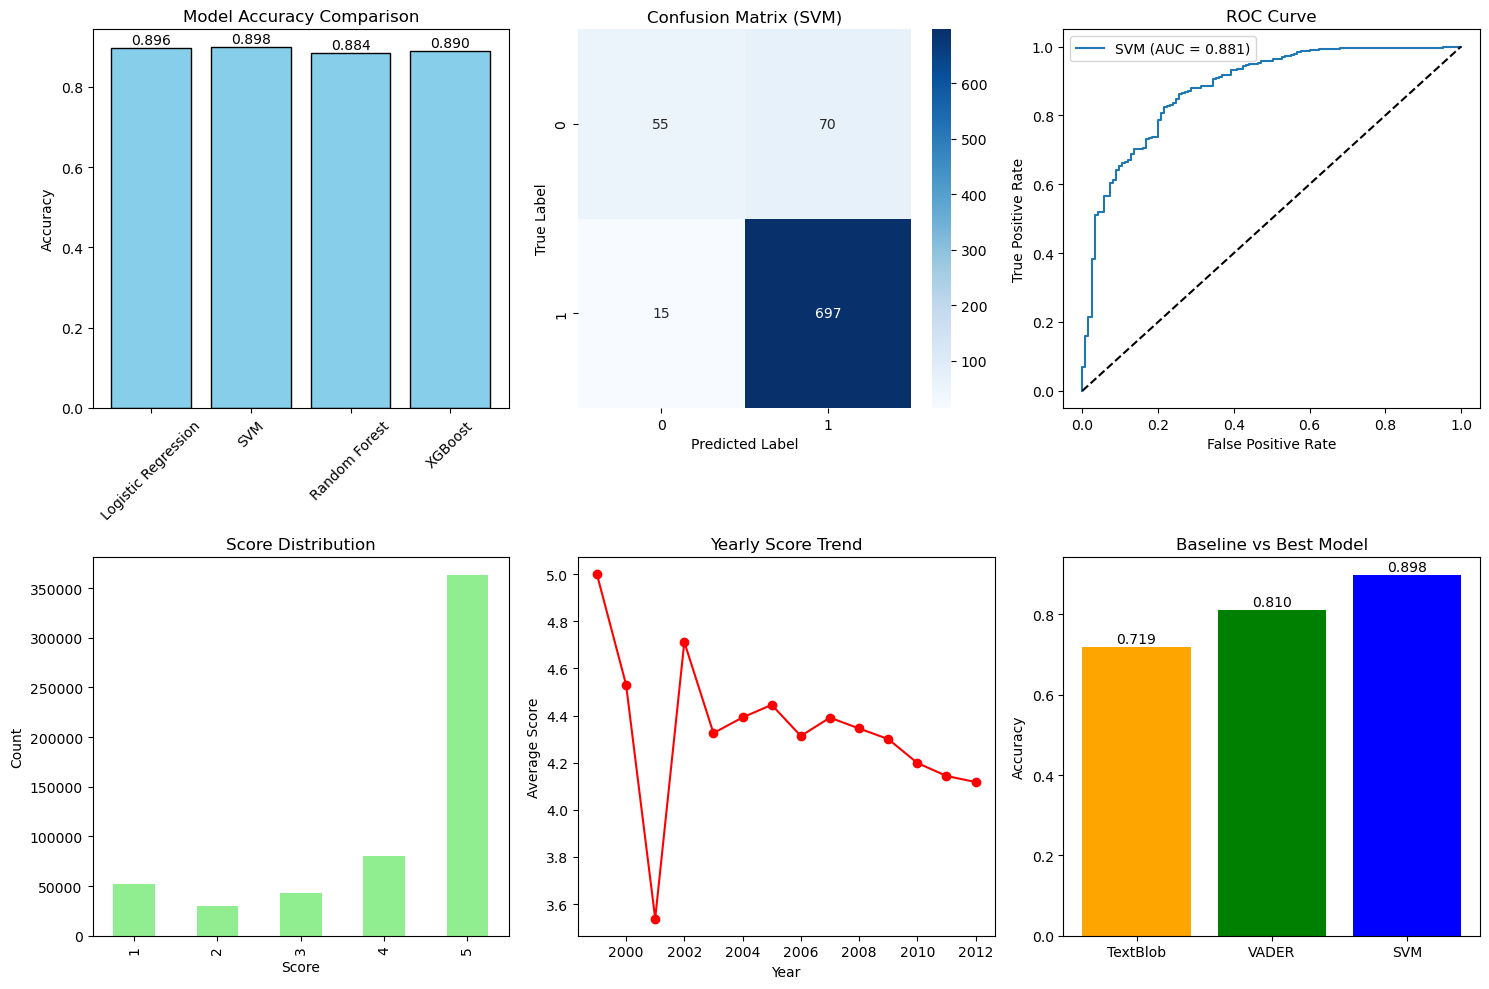


BUSINESS DASHBOARD
----------------------------------------
KEY PERFORMANCE INDICATORS:
• Model Accuracy: 89.8%
• Positive Review Ratio: 78.1%
• Critical Products: 10 ürün
• Total Reviews Analyzed: 568,454
• High-Value Customers: 20 kullanıcı

MODEL DEPLOYMENT READİNESS:
• Precision: 90.9% - Güvenilir tahminler
• Recall: 97.9% - Yüksek yakalama oranı
• F1-Score: 94.3% - Dengeli performans

Visualization tamamlandı


In [352]:
print("=" * 60)
print("VISUALIZATION VE REPORTING")
print("=" * 60)


print("\n MODEL PERFORMANCE VISUALIZATIONS")
print("-" * 40)

plt.figure(figsize=(15, 10))

# Model Comparison
plt.subplot(2, 3, 1)
model_names = list(results.keys())
accuracies = list(results.values())
plt.bar(model_names, accuracies, color='skyblue', edgecolor='black')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f'{v:.3f}', ha='center')

# Confusion Matrix
plt.subplot(2, 3, 2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (SVM)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# ROC Curve
plt.subplot(2, 3, 3)
fpr, tpr, _ = roc_curve(y_test, y_pred_score)
plt.plot(fpr, tpr, label=f'SVM (AUC = {auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# Score Distribution
plt.subplot(2, 3, 4)
data4['Score'].value_counts().sort_index().plot(kind='bar', color='lightgreen')
plt.title('Score Distribution')
plt.xlabel('Score')
plt.ylabel('Count')

# Temporal Trend
plt.subplot(2, 3, 5)
yearly_score.plot(kind='line', marker='o', color='red')
plt.title('Yearly Score Trend')
plt.xlabel('Year')
plt.ylabel('Average Score')

# Feature Importance (basit version)
plt.subplot(2, 3, 6)
baseline_accs = [0.719, 0.810, 0.898]
baseline_names = ['TextBlob', 'VADER', 'SVM']
plt.bar(baseline_names, baseline_accs, color=['orange', 'green', 'blue'])
plt.title('Baseline vs Best Model')
plt.ylabel('Accuracy')
for i, v in enumerate(baseline_accs):
    plt.text(i, v + 0.01, f'{v:.3f}', ha='center')

plt.tight_layout()
plt.show()

print("\nBUSINESS DASHBOARD")
print("-" * 40)

# Key metrics özeti
print("KEY PERFORMANCE INDICATORS:")
print(f"• Model Accuracy: {results['SVM']:.1%}")
print(f"• Positive Review Ratio: {(data4['Score'] >= 4).mean():.1%}")
print(f"• Critical Products: {len(worst_products)} ürün")
print(f"• Total Reviews Analyzed: {len(data4):,}")
print(f"• High-Value Customers: {len(high_value_users)} kullanıcı")

print("\nMODEL DEPLOYMENT READİNESS:")
print(f"• Precision: {precision:.1%} - Güvenilir tahminler")
print(f"• Recall: {recall:.1%} - Yüksek yakalama oranı")
print(f"• F1-Score: {f1:.1%} - Dengeli performans")

print("\nVisualization tamamlandı")